<a href="https://colab.research.google.com/github/Garlid/MIT_Applied_DS_Capstone/blob/main/Capstone_Project_Reference_Notebook_Low_Code_Marketing_Campaign_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Campaign Analysis**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for the Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise.

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques.

### **Loading Libraries**

In [ ]:
#Here we will install scikit-learn, but we will install the extra algorithms that enhance the regular scikitlearn library.
#The '!' is the python command to execute the command as a shell command.
#pip is the python package manager used to install the scikit-learn extra package
#Scikitlearn is a machine learning library for python that helps with machine learning models and data analysis
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.3 MB/s eta 0:00:00


In [ ]:
# Libraries to help with reading and manipulating data
# We can create numpy arrays with numpy. Numpy also handles linear algebra and statistcal funtions.
# Pandas allows us to create dataframes and read csv files and excel files
import numpy as np
import pandas as pd

# Libraries to help with data visualization
# Matplotlib is a library that helps with data visualization. Seaborn is built on top of matplotlib
# and helps to make the plots more visually appealing.
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
# The preprocessing module lives within scikitlearn. It contains class called StandardScalar that scales numeric data to have a mean of zero.
from sklearn.preprocessing import StandardScaler

# To compute distances
# Scipy is a math/science/engineering library built on numpy. The spatial.distance module contains cdist function to calculate the  calculates
# the pairwise distances between observations in two sets of input vectors or matrices.
from scipy.spatial.distance import cdist

# To perform K-means clustering and compute Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and Silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer

# Importing PCA
from sklearn.decomposition import PCA

# To encode the variable
from sklearn.preprocessing import LabelEncoder

# Importing TSNE
from sklearn.manifold import TSNE

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import Gaussian Mixture
from sklearn.mixture import GaussianMixture

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Let us load the data**

In [ ]:
# loading the dataset
data = pd.read_csv("/content/drive/MyDrive/Data Science/Capstone/marketing_campaign+%284%29.csv")

### **Check the shape of the data**

In [ ]:
# Print the shape of the data
print(data.shape)

(2240, 27)


#### **Observations and Insights:**
The data has 27 columns and 2240 rows. That is a lot of data to analyze without dimentionality reduction. We will need to perform dimentionality reduction (either PCA or T-SNE) on this data set in order to extract meaningful insights.

### **Understand the data by observing a few rows**

In [ ]:
# View first 5 rows
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  

[5 rows x 27 columns]

In [ ]:
# View last 5 rows Hint: Use tail() method
data.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
2235         1  13-06-2013       46       709  ...                    3   
2236         1  10-06-2014       56       406  ...                    2   
2237         0  25-01-2014       91       908  ...                    3   
2238         1  24-01-2014        8       428  ...                    5   
2239         1  15-10-2012       40        84  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
2235             0             0             0         0         0  
2236             0             1             0         0         0  
2237             0             0             0         0         0  
2238             0             0             0         0         0  
2239             0             0             0         0         1  

[5 rows x 27 columns]

#### **Observations and Insights:**
In both the first five rows and last five rows, we see:
* Many of the birth years are between the 50's and 60's, with some earlier and some later.
* Education levels from Graduation through doctorate.
* Many of the incomes are between $50k-$60k, with some over and some under.
* There are not many children, one or two at most.
* Recency, or days since last visit, looks like it's right around 1-2 months for most.

Additionally:
* Looks like we have a few different data types, namely, strings, integers, and floats.

### **Let us check the data types and and missing values of each column**

In [ ]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Find the percentage of missing values in each column of the data
# Here we have code that looks for values that are null and then calculates the average.
missing_percentage = (data.isnull().mean() * 100).round(2)
print(missing_percentage)

ID                     0.00
Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 1.07
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntWines               0.00
MntFruits              0.00
MntMeatProducts        0.00
MntFishProducts        0.00
MntSweetProducts       0.00
MntGoldProds           0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
Complain               0.00
Response               0.00
dtype: float64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### **Observations and Insights:**
* The only column that is missing data is income. 1.07% of the values for income are missing. That equates to 24 values for income that are missing. We must impute these values.

In [ ]:
# Check which rows in 'Income' are blank
blank_rows = data[data['Income'].isnull()]

# Display the DataFrame and the rows with blank values in the column 'Income'
print("\nRows with blank values in 'Income':")
print(blank_rows)


Rows with blank values in 'Income':
         ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0     

In [ ]:
#We will be imputing the missing values with the median value of the column Income. The code below fills in the NaN values with the median of Income.
data.Income.fillna(data.Income.median(), inplace = True)

#Next, we will convert the horsepower column from object data type to float so we can manipulate this as a numeric variable rather than string.
data['Income'] = data['Income'].astype('float64')

data['Income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

We have now imputed missing values for Income. Let's check to verify all missing values have been imputed.

In [ ]:
# Check which rows in 'Income' are blank
blank_rows = data[data['Income'].isnull()]

# Display the DataFrame and the rows with blank values in 'Income'
print("\nRows with blank values in 'Income':")
print(blank_rows)


Rows with blank values in 'Income':
Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response]
Index: []

[0 rows x 27 columns]


Here we see that 0 rows were returned in our query for NaN values in the Income column. Imputation of missing values is complete.

We can observe that `ID` has no null values. Also the number of unique values are equal to the number of observations. So, `ID` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

**Dropping the ID column**

In [ ]:
# Remove ID column from data. Hint: Use inplace = True
data.drop('ID', axis = 1, inplace = True)

We have now dropped the ID column. Let's check to see if this column has been removed.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

We can see ID is now dropped.

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [ ]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2240.000000    2240.000000  2240.000000  2240.000000  2240.000000   
mean   1968.805804   52237.975446     0.444196     0.506250    49.109375   
std      11.984069   25037.955891     0.538398     0.544538    28.962453   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35538.750000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68289.750000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count       2240.000000  ...          2240.000000        2240.000000   
mean          27.062946  ...             2.662054           5.790179   
std           41.280498  ...             2.923101           3.250958   
min            0.000000  ...             0.000000           0.000000   
25%            1.000000  ...             0.000000           3.000000   
50%            8.000000  ...             2.000000           5.000000   
75%           33.000000  ...             4.000000           8.000000   
max          263.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  
count   2240.000000   2240.000000  2240.000000  2240.000000  
mean       0.064286      0.012946     0.009375     0.149107  
std        0.245316      0.113069     0.096391     0.356274  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 23 columns]

#### **Observations and Insights:**
* The birth years range from 1893 to 1996.
* The number of online purchases and in store purchases hovers around 5.
* The average of wine and meat products exceeds that of fruits, sweets, and fish products.
* The average number of children .44 while the average number of teans is ~.51.

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [ ]:
# List of the categorical columns in the data
cols = ["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain"]

**Number of unique observations in each category**

In [ ]:
for column in cols:
    print("Unique values in", column, "are :")
    print(data[column].value_counts())
    print("*" * 50)

Unique values in Education are :
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Kidhome are :
0    1293
1     899
2      48
Name: Kidhome, dtype: int64
**************************************************
Unique values in Teenhome are :
0    1158
1    1030
2      52
Name: Teenhome, dtype: int64
**************************************************
Unique values in Complain are :
0    2219
1      21
Name: Complain, dtype: int64
**************************************************


#### **Observations and Insights:**
* The majority of customers have graduated from college. The least number of customers only have a basic level of education.
* Most customers are married, with very few with marital status as "YOLO", "Alone", and "Absurd".
* Most customers do not have children or teens in the home.
* Only 21 customers have submitted a complaint in the past two years.

**Think About It:**

- We could observe from the summary statistics of categorical variables that the Education variable has 5 categories. Are all categories different from each other or can we combine some categories? Is 2n Cycle different from Master?
- Similarly, there are 8 categories in Marital_Status with some categories having very low count of less than 5. Can we combine these categories with other categories?

### **Let us replace  the "2n Cycle" category with "Master" in Education and "Alone", "Absurd, and "YOLO" with "Single" in Marital_Status**

In [ ]:
# Replace the category "2n Cycle" with the category "Master"

data["Education"].replace("2n Cycle", "Master", inplace = True)  # Hint: Use the replace() method and inplace=True

In [ ]:
# Replace the categories "Alone", "Abusrd", "YOLO" with the category "Single"

data["Marital_Status"].replace("Alone", "Single", inplace = True) # Hint: Use the replace() method and inplace=True
data["Marital_Status"].replace("Absurd", "Single", inplace = True)
data["Marital_Status"].replace("YOLO", "Single", inplace = True)

In [ ]:
for column in cols:
    print("Unique values in", column, "are :")
    print(data[column].value_counts())
    print("*" * 50)

Unique values in Education are :
Graduation    1127
Master         573
PhD            486
Basic           54
Name: Education, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Kidhome are :
0    1293
1     899
2      48
Name: Kidhome, dtype: int64
**************************************************
Unique values in Teenhome are :
0    1158
1    1030
2      52
Name: Teenhome, dtype: int64
**************************************************
Unique values in Complain are :
0    2219
1      21
Name: Complain, dtype: int64
**************************************************


We have now replaced 2n Cycle with Master and YOLO, Absurd, and Alone with Single.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms help to visualize and describe numerical data. We can also use other plots like box plot to analyze the numerical columns.

#### Let us plot histogram for the feature 'Income' to understand the distribution and outliers, if any.

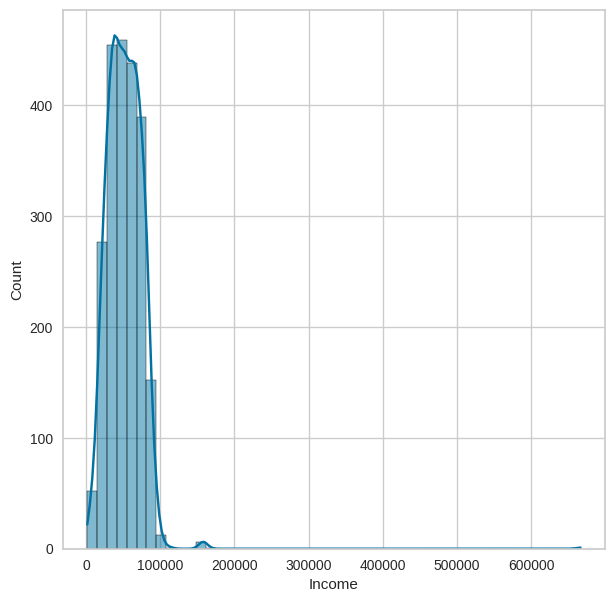

In [ ]:
# Create histogram for the Income feature
plt.figure(figsize = (7, 7))
sns.histplot(x='Income', data=data, bins = 50,kde= True)
plt.show()

**We could observe some extreme value on the right side of the distribution of the 'Income' feature. Let's use a box plot as it is more suitable to identify extreme values in the data.**

<Axes: xlabel='Income'>

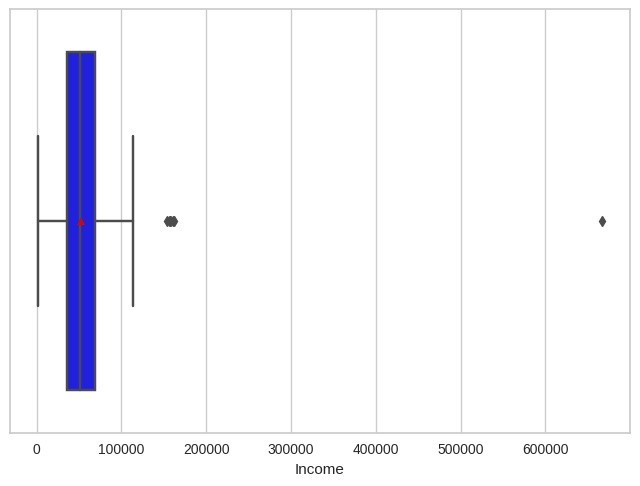

In [ ]:
# Plot the boxplot
sns.boxplot(data=data, x='Income', showmeans=True, color="blue")

#### **Observations and Insights: _____**

**Think About It**

- The histogram and the box plot are showing some extreme value on the right side of the distribution of the 'Income' feature. Can we consider them as outliers and remove or should we analyze these extreme values?

In [ ]:
# Calculating the upper whisker for the Income variable

Q1 = data.quantile(q=0.25)                          # Finding the first quartile

Q3 = data.quantile(q=0.75)                          # Finding the third quartile

IQR = Q3-Q1                                         # Finding the Inter Quartile Range

upper_whisker = (Q3 + 1.5 * IQR)['Income']          # Calculating the Upper Whisker for the Income variable

print(upper_whisker)                                # Printing Upper Whisker

117416.25


In [ ]:
# Let's check the observations with extreme value for the Income variable
data[data.Income > upper_whisker]

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
164         1973         PhD        Married  157243.0        0         1   
617         1976         PhD       Together  162397.0        1         1   
655         1975  Graduation       Divorced  153924.0        0         0   
687         1982         PhD        Married  160803.0        0         0   
1300        1971      Master       Together  157733.0        1         0   
1653        1977  Graduation       Together  157146.0        0         0   
2132        1949         PhD        Married  156924.0        0         0   
2233        1977  Graduation       Together  666666.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
164   01-03-2014       98        20          2  ...                   22   
617   03-06-2013       31        85          1  ...                    0   
655   07-02-2014       81         1          1  ...                    0   
687   04-08-2012       21        55         16  ...                   28   
1300  04-06-2013       37        39          1  ...                    0   
1653  29-04-2013       13         1          0  ...                   28   
2132  29-08-2013       85         2          1  ...                    0   
2233  02-06-2013       23         9         14  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
164                   0                  0             0             0   
617                   1                  1             0             0   
655                   0                  0             0             0   
687                   1                  0             0             0   
1300                  1                  1             0             0   
1653                  0                  1             0             0   
2132                  0                  0             0             0   
2233                  3                  6             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
164              0             0             0         0         0  
617              0             0             0         0         0  
655              0             0             0         0         0  
687              0             0             0         0         0  
1300             0             0             0         0         0  
1653             0             0             0         0         0  
2132             0             0             0         0         0  
2233             0             0             0         0         0  

[8 rows x 26 columns]

**Think About It:**

- We observed that there are only a few rows with extreme values for the Income variable. Is that enough information to treat (or not to treat) them? Do we know at what percentile the upper whisker lies?

In [ ]:
# Check the 99.5% percentile value for the Income variable
data.quantile(q=.995)['Income']

102122.94999999997

#### **Observations and Insights: _____**




In [ ]:
# Dropping observations identified as outliers
data.drop(index=[164,617,655,687,1300,1653,2132,2233], inplace=True) # Pass the indices of the observations (separated by a comma) to drop them

**Now, let's check the distribution of the Income variable after dropping outliers.**

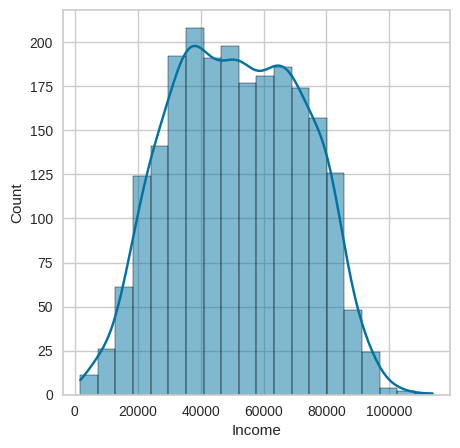

In [ ]:
# Plot histogram and 'Income'
plt.figure(figsize = (5, 5))
sns.histplot(x='Income', data=data, bins = 20,kde= True)
plt.show()

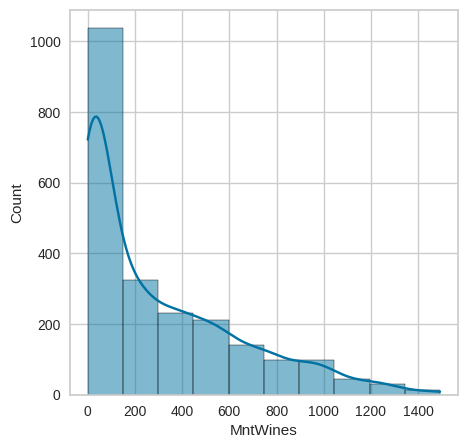

In [ ]:
# Plot the histogram for 'MntWines'
plt.figure(figsize = (5, 5))
sns.histplot(x='MntWines', data=data, bins = 10,kde= True)
plt.show()

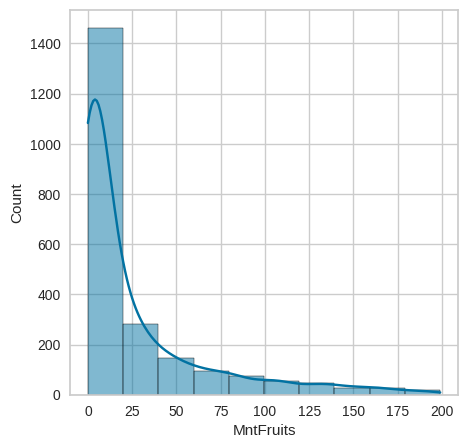

In [ ]:
# Plot the histogram for 'MntFruits'
plt.figure(figsize = (5,5))
sns.histplot(x='MntFruits', data=data, bins = 10,kde= True)
plt.show()

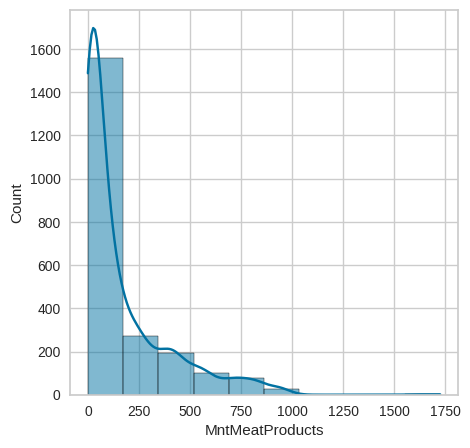

In [ ]:
# Plot the histogram for 'MntMeatProducts'
plt.figure(figsize = (5,5))
sns.histplot(x='MntMeatProducts', data=data, bins = 10,kde= True)
plt.show()

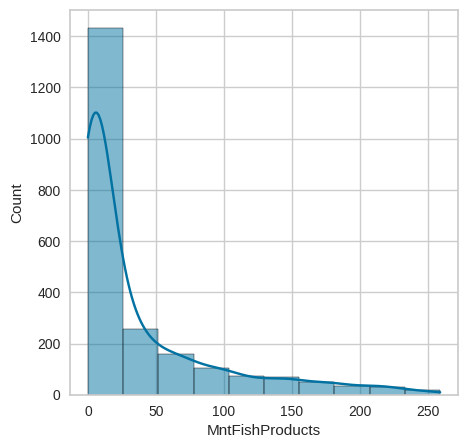

In [ ]:
# Plot the histogram for 'MntFishProduct'
plt.figure(figsize = (5,5))
sns.histplot(x='MntFishProducts', data=data, bins = 10,kde= True)
plt.show()

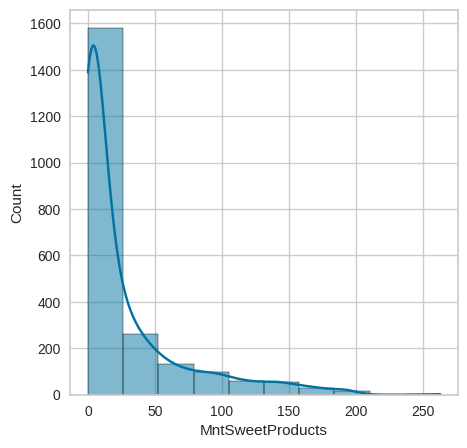

In [ ]:
# Plot the histogram for 'MntSweetProducts'
plt.figure(figsize = (5,5))
sns.histplot(x='MntSweetProducts', data=data, bins = 10,kde= True)
plt.show()

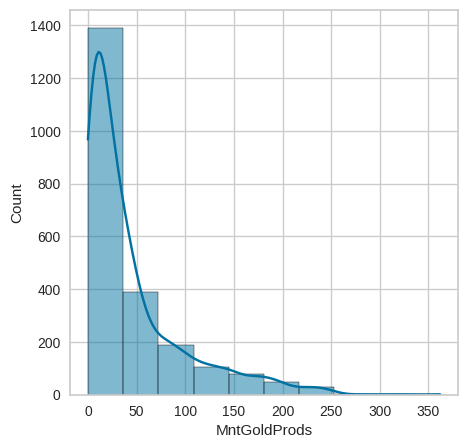

In [ ]:
# Plot the histogram for 'MntGoldProducts'
plt.figure(figsize = (5,5))
sns.histplot(x='MntGoldProds', data=data, bins = 10,kde= True)
plt.show()

In [ ]:
col_for_goods_boxplot = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

#### **Note:** Try plotting histogram for different numerical features and understand how the data looks like.

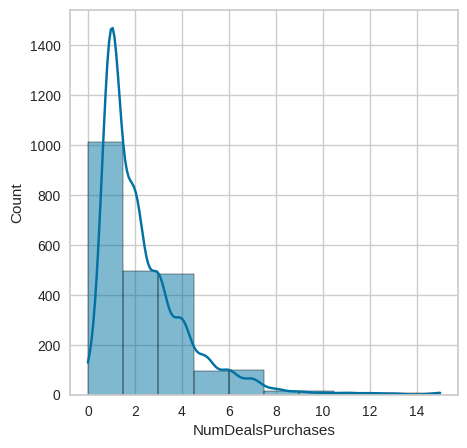

In [ ]:
plt.figure(figsize = (5,5))
sns.histplot(x='NumDealsPurchases', data=data, bins = 10,kde= True)
plt.show()

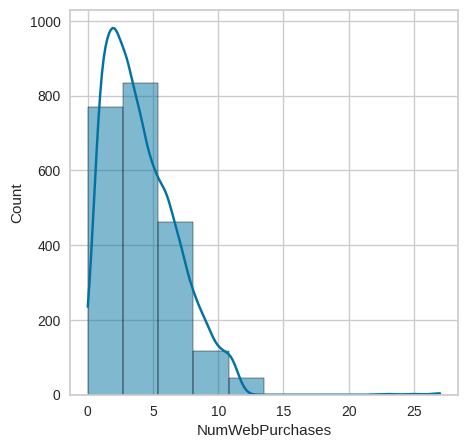

In [ ]:
plt.figure(figsize = (5,5))
sns.histplot(x='NumWebPurchases', data=data, bins = 10,kde= True)
plt.show()

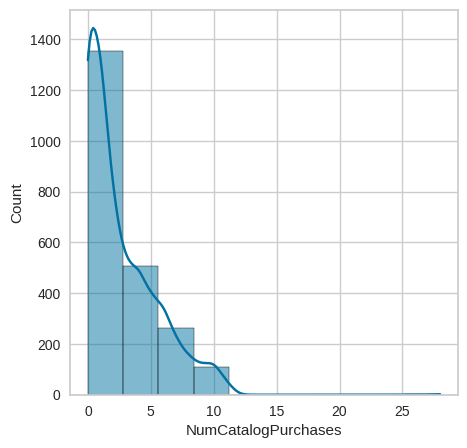

In [ ]:
plt.figure(figsize = (5,5))
sns.histplot(x='NumCatalogPurchases', data=data, bins = 10,kde= True)
plt.show()

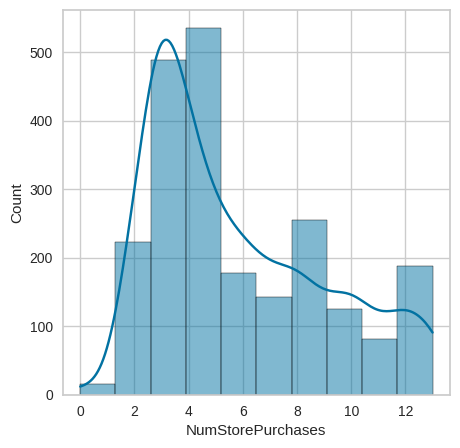

In [ ]:
plt.figure(figsize = (5,5))
sns.histplot(x='NumStorePurchases', data=data, bins = 10,kde= True)
plt.show()

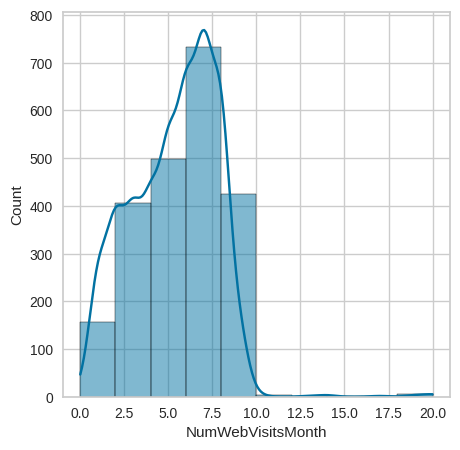

In [ ]:
plt.figure(figsize = (5,5))
sns.histplot(x='NumWebVisitsMonth', data=data, bins = 10,kde= True)
plt.show()

#### **Observations and Insights for all the plots: _____**

## **2. Univariate analysis - Categorical Data**

Let us write a function that will help us create bar plots that indicate the percentage for each category. This function takes the categorical column as the input and returns the bar plot for the variable.

In [ ]:
def perc_on_bar(data, z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z])                                          # Length of the column

    plt.figure(figsize=(15,5))

    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05                  # Width of the plot
        y = p.get_y() + p.get_height()                            # Height of the plot

        ax.annotate(percentage, (x, y), size = 12)                # Annotate the percentage

    plt.show()                                                    # Show the plot

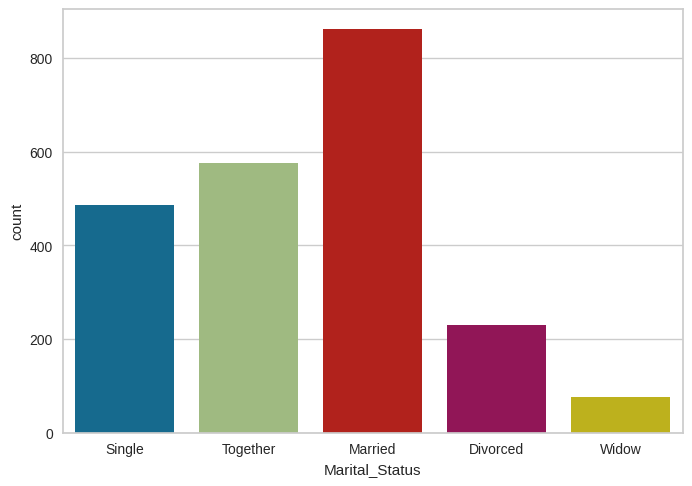

In [ ]:
sns.countplot(x='Marital_Status',data=data)
plt.show()

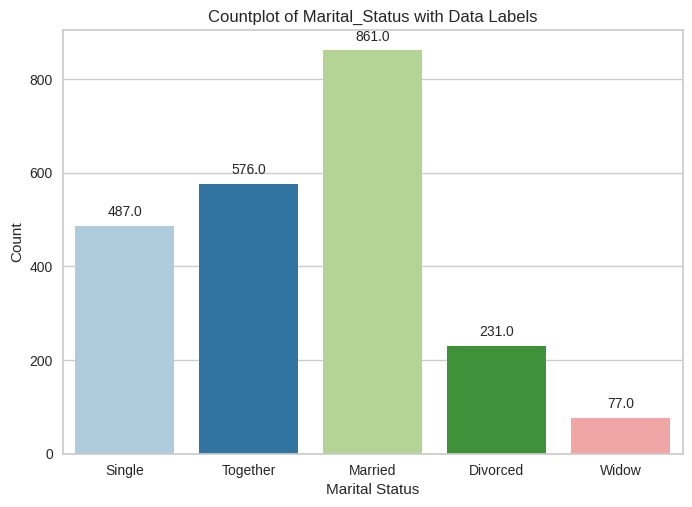

In [ ]:
ax = sns.countplot(x='Marital_Status', palette='Paired', data=data)

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', size=10)

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Countplot of Marital_Status with Data Labels')

# Show the plot
plt.show()

#### Let us plot barplot for the variable Marital_Status.

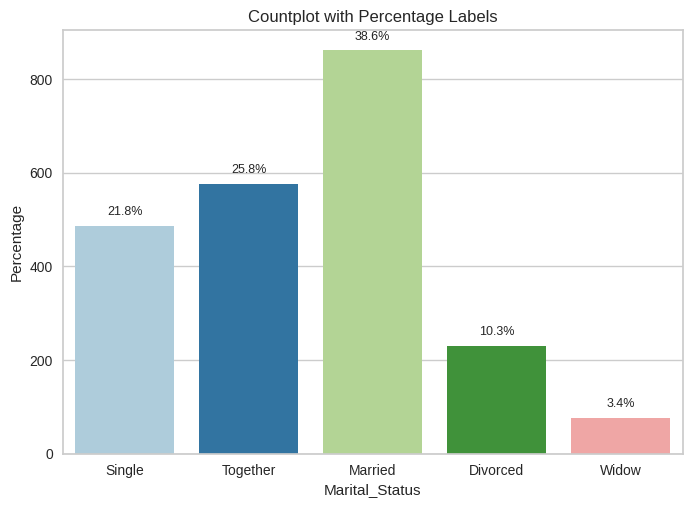

In [ ]:
ax = sns.countplot(x='Marital_Status',data=data, palette='Paired')

# Calculate total number of observations
total_obs = len(data['Marital_Status'])

# Add percentage labels to each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_obs)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', size=9)

# Add labels and title
plt.xlabel('Marital_Status')
plt.ylabel('Percentage')
plt.title('Countplot with Percentage Labels')

# Show the plot
plt.show()

#### **Note:** Explore for other categorical variables like Education, Kidhome, Teenhome, Complain.

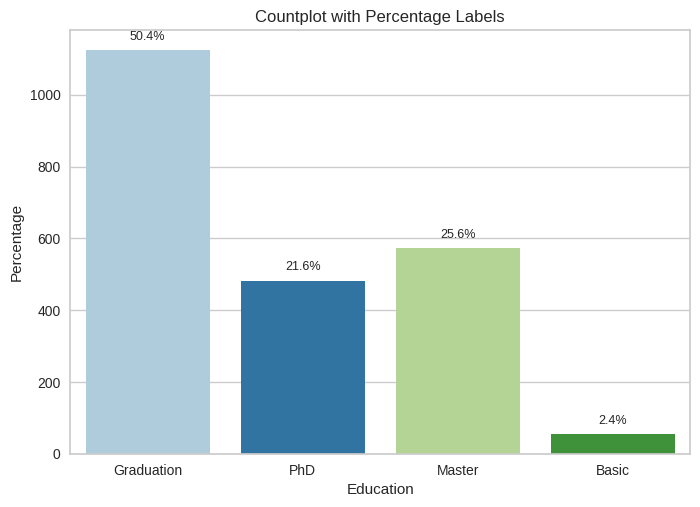

In [ ]:
ax = sns.countplot(x='Education',data=data, palette='Paired')

# Calculate total number of observations
total_obs = len(data['Education'])

# Add percentage labels to each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_obs)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', size=9)

# Add labels and title
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.title('Countplot with Percentage Labels')

# Show the plot
plt.show()

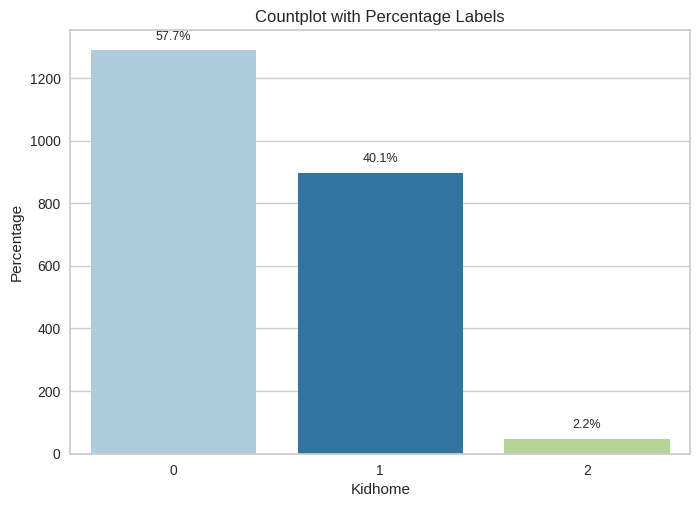

In [ ]:
ax = sns.countplot(x='Kidhome',data=data, palette='Paired')

# Calculate total number of observations
total_obs = len(data['Kidhome'])

# Add percentage labels to each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_obs)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', size=9)

# Add labels and title
plt.xlabel('Kidhome')
plt.ylabel('Percentage')
plt.title('Countplot with Percentage Labels')

# Show the plot
plt.show()

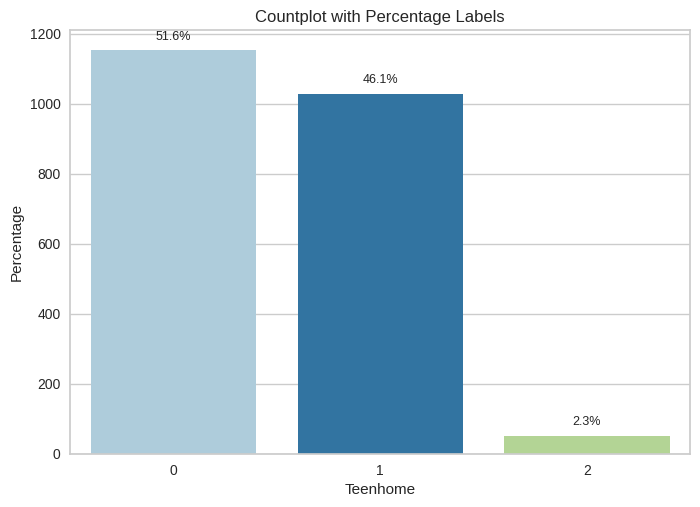

In [ ]:
ax = sns.countplot(x='Teenhome',data=data, palette='Paired')

# Calculate total number of observations
total_obs = len(data['Teenhome'])

# Add percentage labels to each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_obs)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', size=9)

# Add labels and title
plt.xlabel('Teenhome')
plt.ylabel('Percentage')
plt.title('Countplot with Percentage Labels')

# Show the plot
plt.show()

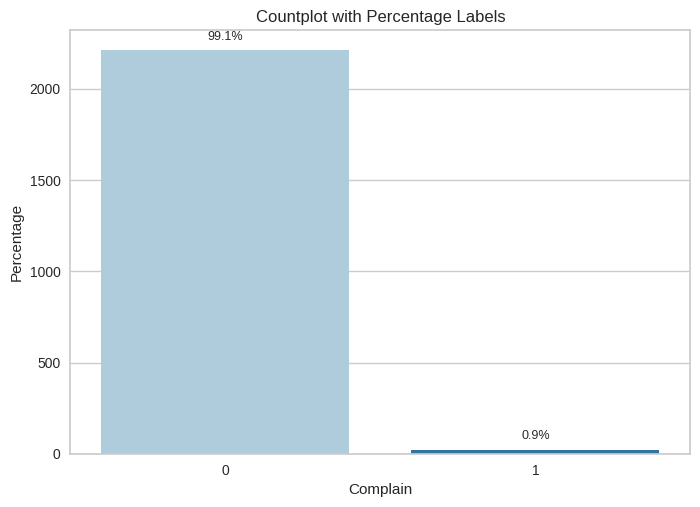

In [ ]:
ax = sns.countplot(x='Complain',data=data, palette='Paired')

# Calculate total number of observations
total_obs = len(data['Complain'])

# Add percentage labels to each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_obs)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', size=9)

# Add labels and title
plt.xlabel('Complain')
plt.ylabel('Percentage')
plt.title('Countplot with Percentage Labels')

# Show the plot
plt.show()

#### **Observations and Insights from all plots: _____**
* The majority of customers are married (38.6%). The least number are widowed (3.4%).
* The majority of customers have graduated from college(50.4%). The least only have basic education.
* Over 50% of customers do not have any children or teens in the home. Slightly more than 2% of customers have either children or teens in the home.
* Less than 1% of customers have submitted at least one complaint in the last two years.

## **Bivariate Analysis**

We have analyzed different categorical and numerical variables. Now, let's check how different variables are related to each other.

### **Correlation Heat map**
Heat map can show a 2D correlation matrix between numerical features.

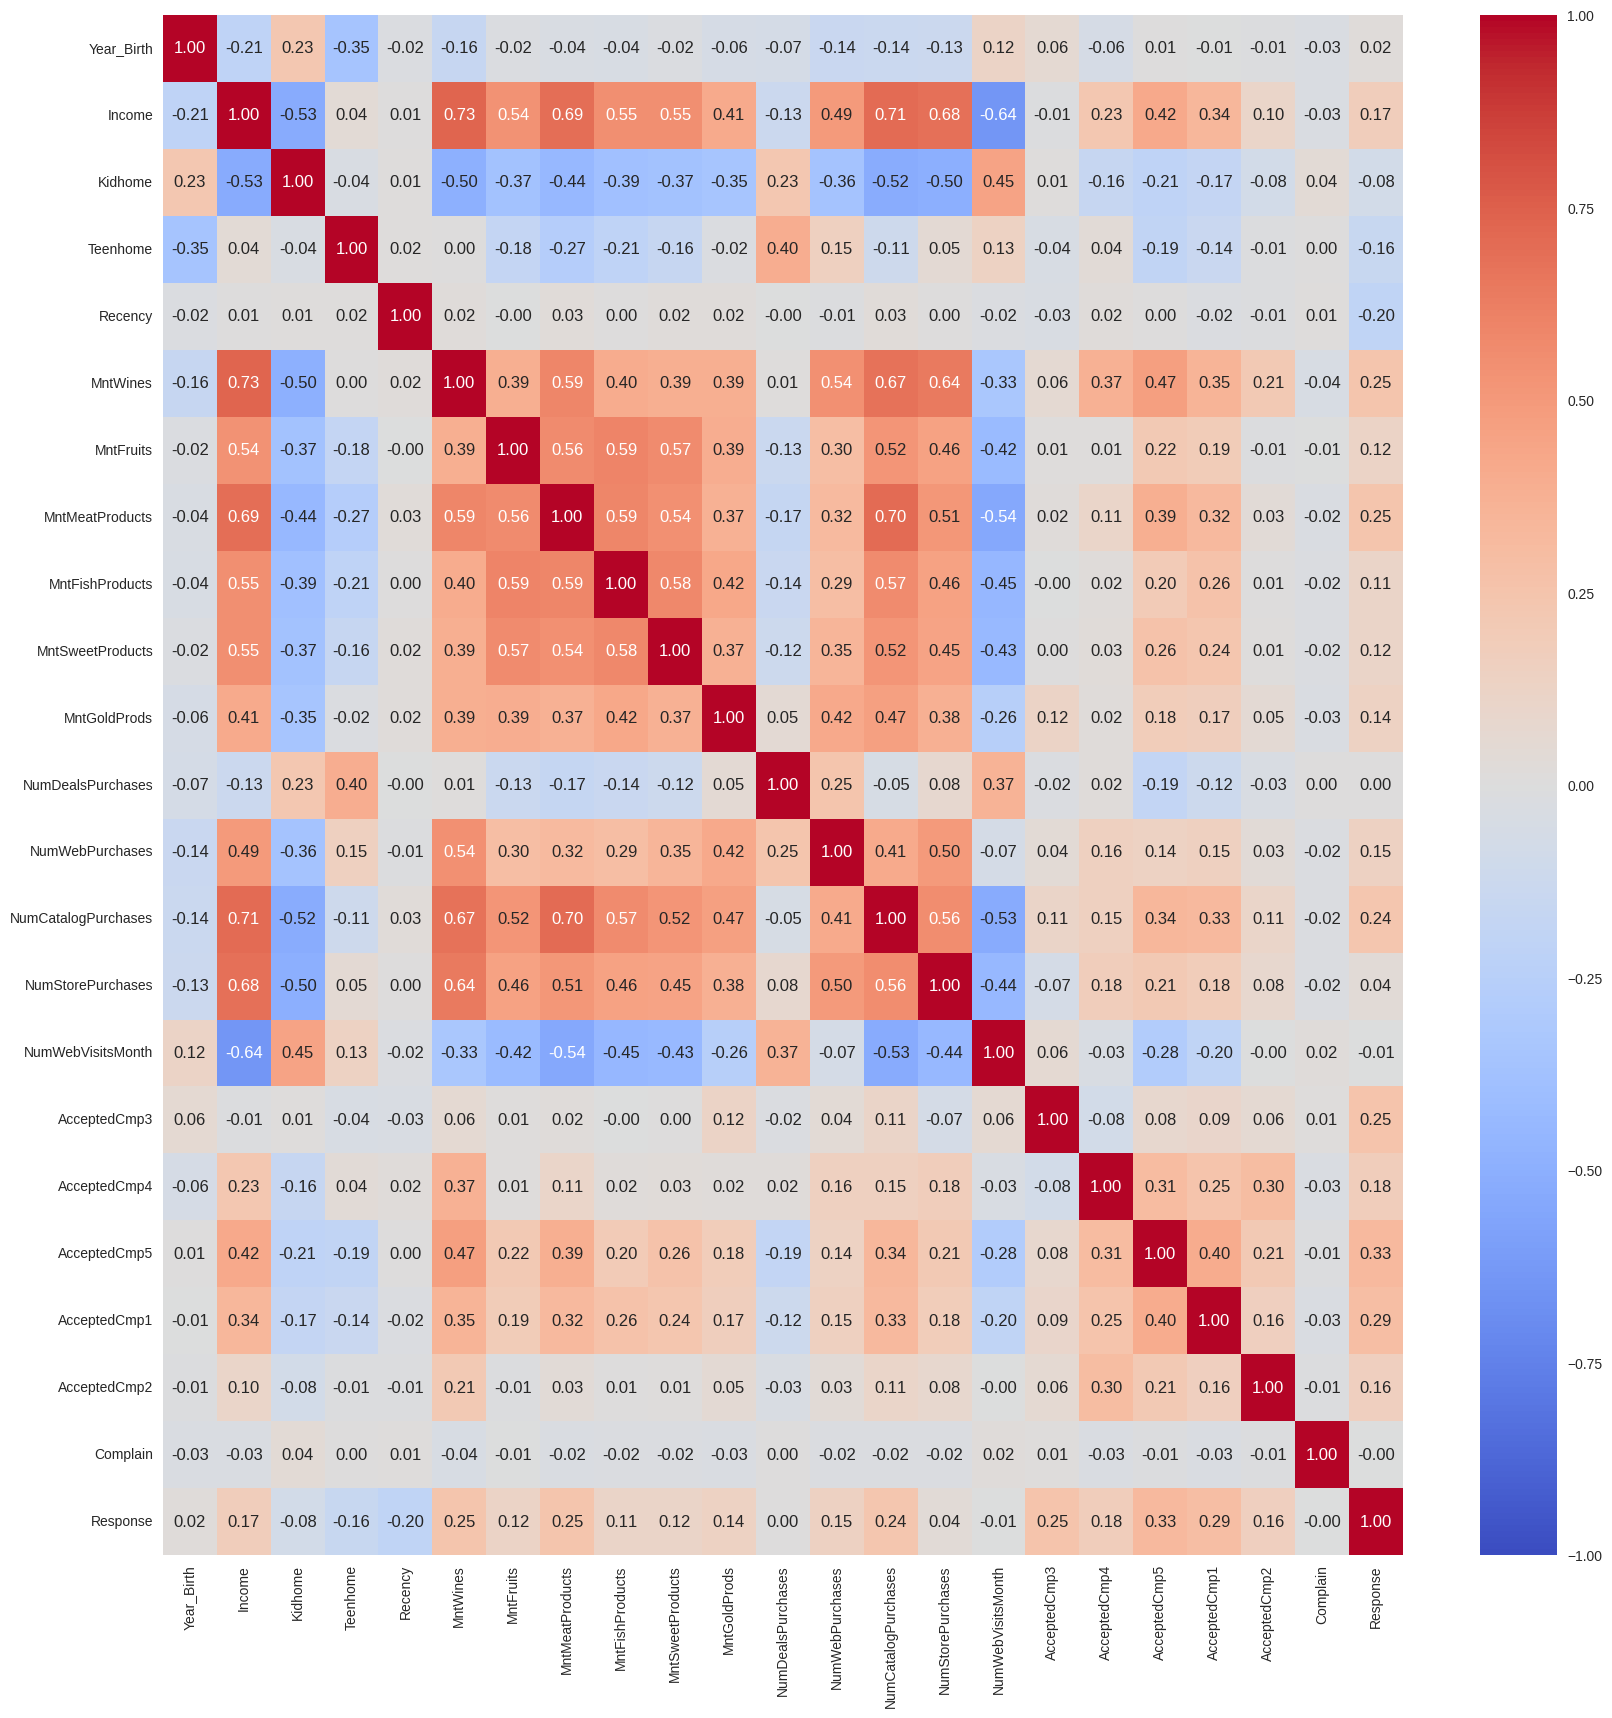

In [ ]:
plt.figure(figsize=(20, 20))

numerical_columns=data.select_dtypes(include=['int', 'float']).columns

correlation_matrix = data[numerical_columns].corr()

sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm")

plt.show()

#### **Observations and Insights:**
In a heatmap, when two variables are positively correlated then when one variable increases the other tends to increase. The inverse is true when two variables are negatively correlated. The correlation coefficient quantifies the strength and direction of this relationship

* Income is positively correlated with the Number of Catalog purchases, number of store purchases, Amount of wines, amount of meat.
* Income is negatively correlated with web visits per month.
* Income is somewhat positively correlated with amount of sweet products, amount of fruits, and amount of gold.
* Kidhome is negatively correlated with income, amount of wines, number of catalog purchases, and number of store purchases. That means, the more children there are the less income.
* Kidhome is positively correlated with number of web visits per month.That means the more children around the more web visits per month.
* Amount of wine is positively correlated with meat products, fish products, web purchases, catalog purchases, and store purchases.
* Amount of wine is negatively correlated with number of web visits per month
* Amount of fruit is positivley correlated with meat, fish, sweet, and gold products and catalog purchases
* Amount of meat products is strongly correlated with number of catalog purchases.
* It seems that most of the food and gold products are strongly positivley correlated
* Number of deals purchases is positivley correlated with number of web visits per month.
* Number of web purchases is positively correlated with catalog and store purchases
* Number of catalog purchases and number of web visits per month are negatively correlated with number of web visits per month

**The above correlation heatmap only shows the relationship between numerical variables. Let's check the relationship of numerical variables with categorical variables.**

### **Education Vs Income**

Axes(0.125,0.11;0.775x0.77)


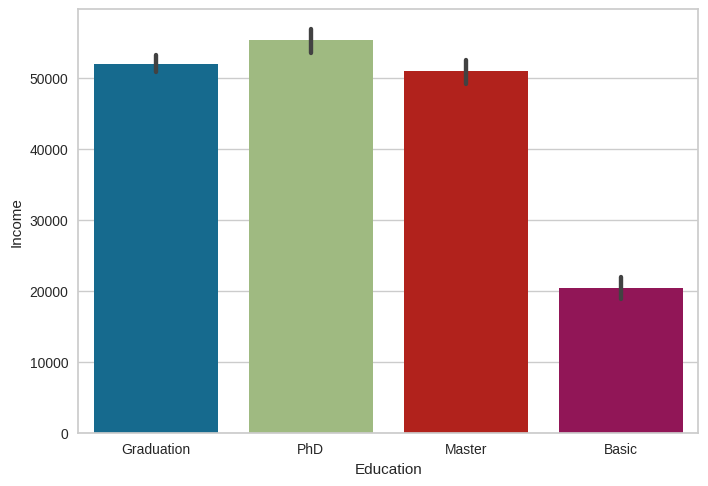

In [ ]:
print(sns.barplot(x='Education', y='Income', data=data))

#### **Observations and Insights:**
* Those with basic education have the least income
* Those with a bachelor's degree make slightly morethan those with a master's degree
* Those with a doctorate degree makea bit more than those with a bachelor's or master's degree

### **Marital Status Vs Income**

Axes(0.125,0.11;0.775x0.77)


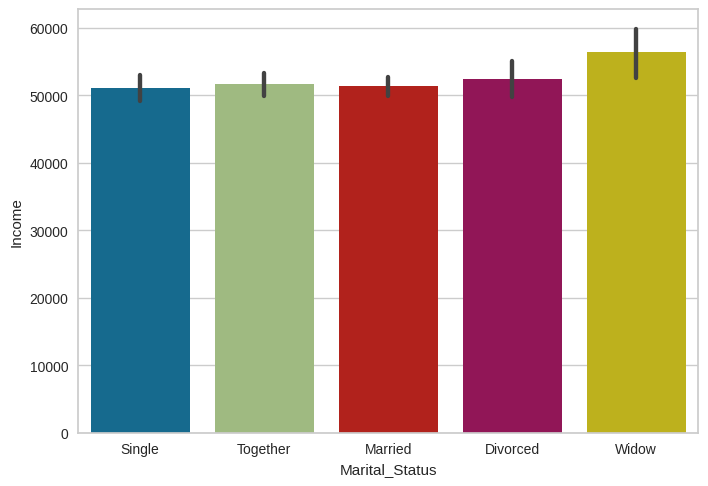

In [ ]:
print(sns.barplot(x='Marital_Status', y='Income', data=data))

#### **Observations and Insights:**
* Income does not seem to be strongly correlated with marital status.
* Incomes of customers of most marital statuses have roughly the

### **Kidhome Vs Income**

Axes(0.125,0.11;0.775x0.77)


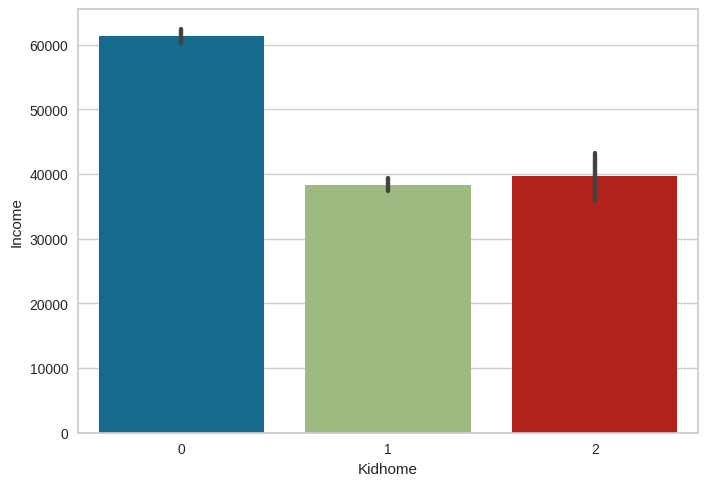

In [ ]:
print(sns.barplot(x='Kidhome', y='Income', data=data))


#### **Observations and Insights: _____**

**We can also visualize the relationship between two categorical variables.**

### **Marital_Status Vs Kidhome**

<Axes: xlabel='Marital_Status'>

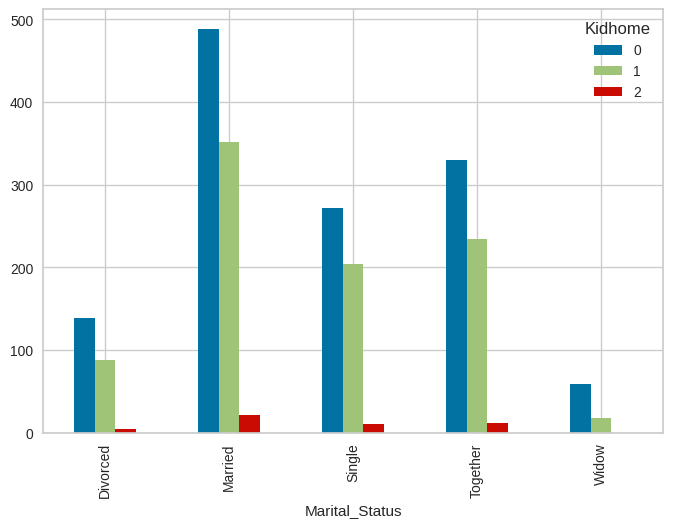

In [ ]:
# Plot the bar plot for Marital_Status and Kidhome
pd.crosstab(data['Marital_Status'],data['Kidhome']).plot(kind='bar',stacked=False)

#### **Observations and Insights:**
* Customers who are married have the most homes with children (at least 1).
* Most customrs have either 0 or 1 child at home.


## **Feature Engineering and Data Processing**

In this section, we will first prepare our dataset for analysis.
- Creating new columns
- Imputing missing values

**Think About It:**

- The Year_Birth column in the current format might not be very useful in our analysis. The Year_Birth column contains the information about Day, Month, and year. Can we extract the age of each customer?
- Are there other columns which can be used to create new features?

### **Age**

In [ ]:
# Extract only the year from the Year_Birth variable and subtracting it from 2016 will give us the age of the customer at the time of data collection in 2016

data["Age"] = 2016 - pd.to_datetime(data['Year_Birth'], format="%Y").apply(lambda x: x.year)

# Sorting the values in ascending order
data["Age"].sort_values()

1170     20
46       20
696      21
747      21
1850     21
       ... 
424      75
1950     76
192     116
339     117
239     123
Name: Age, Length: 2232, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

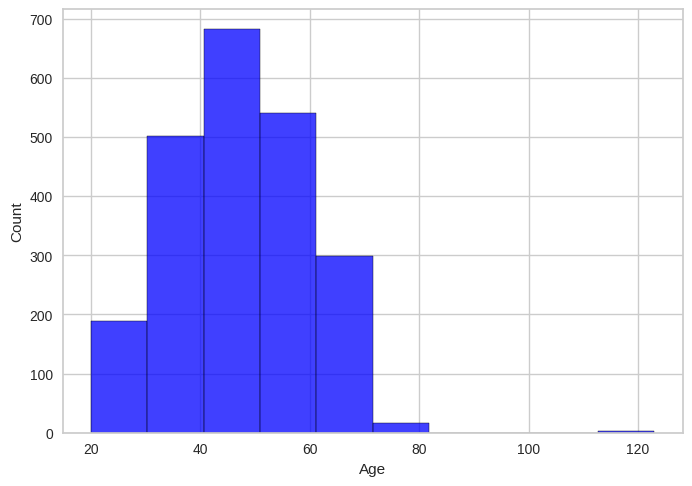

In [ ]:
sns.histplot(data['Age'], bins = 10, color = 'blue')

#### **Observations and Insights:**
* Most customers are between the age of 40 and 60.
* It appears that at least 1 customer is around 120 years of age. That doesn't seem accurate...

**Think About It:**

- We could observe from the above output that there are customers with an age greater than 115. Can this be true or a data anomaly? Can we drop these observations?

In [ ]:
# Drop the observations with age > 115
# Hint: Use drop() method with inplace=True
data2 = data[data['Age'] < 115]

data2.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2229.000000    2229.000000  2229.000000  2229.000000  2229.000000   
mean   1968.888739   51619.504262     0.444594     0.507402    49.106326   
std      11.707430   20601.216248     0.538636     0.544735    28.946476   
min    1940.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35416.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68118.000000     1.000000     1.000000    74.000000   
max    1996.000000  113734.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2229.000000  2229.000000      2229.000000      2229.000000   
mean    304.991476    26.348587       165.283984        37.642441   
std     336.761943    39.764060       219.336589        54.700548   
min       0.000000     0.000000         0.000000         0.000000   
25%      24.000000     2.000000        16.000000         3.000000   
50%     176.000000     8.000000        67.000000        12.000000   
75%     505.000000    33.000000       231.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumStorePurchases  NumWebVisitsMonth  \
count       2229.000000  ...        2229.000000        2229.000000   
mean          27.161507  ...           5.812472           5.334231   
std           41.338945  ...           3.242144           2.414981   
min            0.000000  ...           0.000000           0.000000   
25%            1.000000  ...           3.000000           3.000000   
50%            8.000000  ...           5.000000           6.000000   
75%           34.000000  ...           8.000000           7.000000   
max          263.000000  ...          13.000000          20.000000   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count   2229.000000   2229.000000   2229.000000   2229.000000   2229.000000   
mean       0.073127      0.074921      0.072678      0.064603      0.013010   
std        0.260403      0.263324      0.259666      0.245879      0.113344   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Complain     Response          Age  
count  2229.000000  2229.000000  2229.000000  
mean      0.008973     0.149843    47.111261  
std       0.094319     0.356998    11.707430  
min       0.000000     0.000000    20.000000  
25%       0.000000     0.000000    39.000000  
50%       0.000000     0.000000    46.000000  
75%       0.000000     0.000000    57.000000  
max       1.000000     1.000000    76.000000  

[8 rows x 24 columns]

**Now, let's check the distribution of age in the data.**

<Axes: xlabel='Age', ylabel='Count'>

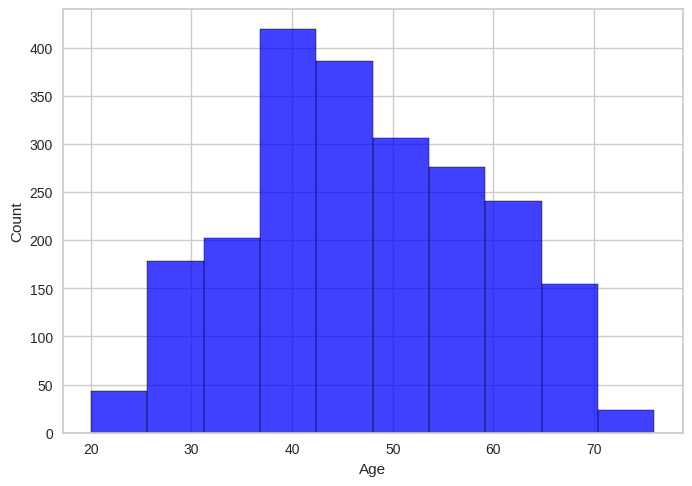

In [ ]:
sns.histplot(data2['Age'], bins = 10, color = 'blue')

#### **Observations and Insights:**
* Now we see that the max age is less than 80.

### **Kids**
* Let's create feature "Kids" indicating the total kids and teens in the home.

In [ ]:
# Add Kidhome and Teenhome variables to create the new feature called "Kids"
data2["Kids"] = data2['Kidhome'] + data2['Teenhome']
print(data2['Kids'])

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Kids, Length: 2229, dtype: int64


### **Family Size**
* Let's create a new variable called 'Family Size' to find out how many members each family has.
* For this, we need to have a look at the Marital_Status variable, and see what are the categories.

In [ ]:
# Check the unique categories in Marial_Status
unique_Marital_Status=data2['Marital_Status'].unique()
print(unique_Marital_Status)

['Single' 'Together' 'Married' 'Divorced' 'Widow']


* We can combine the sub-categories Single, Divorced, Widow as "Single" and we can combine the sub-categories Married and Together as "Relationship"
* Then we can create a new variable called "Status" and assign values 1 and 2 to categories Single and Relationship, respectively.
* Then, we can use the Kids (calculated above) and the Status column to find the family size.

In [ ]:
#Replace "Divorced" and "Widow" with "Single"
data2['Marital_Status'] = data2['Marital_Status'].replace({'Divorced':'Single', 'Widow':'Single'})
unique_Marital_Status2=data2['Marital_Status'].unique()
print(unique_Marital_Status2)

['Single' 'Together' 'Married']


In [ ]:
#Replace "Married" and "Together" with "Relationship"
data2['Marital_Status'] = data2['Marital_Status'].replace({'Married':'Relationship', 'Together':'Relationship'})
unique_Marital_Status3=data['Marital_Status'].unique()
print(unique_Marital_Status3)

['Single' 'Together' 'Married' 'Divorced' 'Widow']


In [ ]:
# Create a new feature called "Status" by replacing "Single" with 1 and "Relationship" with 2 in Marital_Status
data2["Status"] = data2['Marital_Status'].replace({'Single': 1, 'Relationship': 2})
data2['Status'] = data2['Status'].astype(int)
print(data2['Status'])
type(data2['Status'])

0       1
1       1
2       2
3       2
4       2
       ..
2235    2
2236    2
2237    1
2238    2
2239    2
Name: Status, Length: 2229, dtype: int64


pandas.core.series.Series

In [ ]:
# Add two variables Status and Kids to get the total number of persons in each family
data2["Family_Size"] = data2['Status'] + data2['Kids']
print(data2['Family_Size'])

0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Family_Size, Length: 2229, dtype: int64


<Axes: xlabel='Family_Size', ylabel='Count'>

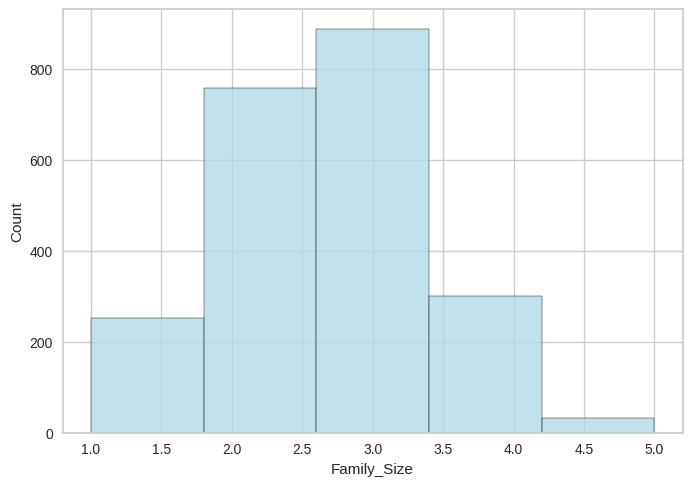

In [ ]:
sns.histplot(data2['Family_Size'], bins = 5, color = 'lightblue')

### **Expenses**
* Let's create a new feature called "Expenses", indicating the total amount spent by the customers in various products over the span of two years.

In [ ]:
# Create a new feature
# Add the amount spent on each of product 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
data2["Expenses"] = data2['MntWines'] + data2['MntFruits'] + data2['MntMeatProducts'] + data2['MntFishProducts'] + data2['MntSweetProducts'] + data2['MntGoldProds']
print(data2['Expenses'])

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Expenses, Length: 2229, dtype: int64


### **Total Purchases**
* Let's create a new feature called "NumTotalPurchases", indicating the total number of products purchased by the customers.

In [ ]:
# Create a new feature
# Add the number of purchases from each channel 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
data2["NumTotalPurchases"] = data2['NumDealsPurchases'] + data2['NumWebPurchases'] + data2['NumCatalogPurchases'] + data2['NumStorePurchases']
print(data2['NumTotalPurchases'])

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: NumTotalPurchases, Length: 2229, dtype: int64


### **Engaged in Days**
* Let's create a new feature called "Engaged in days", indicating how long the customer has been with the company.

In [ ]:
# Converting Dt_customer variable to Python date time object
data2["Dt_Customer"] = pd.to_datetime(data2['Dt_Customer'])

print(data2['Dt_Customer'])

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2229, dtype: datetime64[ns]


**Let's check the max and min of the date.**

In [ ]:
# Check the minimum of the date
# Hint: Use the min() method
data2['Dt_Customer'].min()

Timestamp('2012-01-08 00:00:00')

In [ ]:
# Check the maximum of the date
# Hint: Use the max() method
data2['Dt_Customer'].max()

Timestamp('2014-12-06 00:00:00')

**Think About It:**
- From the above output from the max function, we observed that the last customer enrollment date is December 6th, 2014. Can we extract the number of days a customer has been with the company using some date as the threshold? Can January 1st, 2015 be that threshold?

In [ ]:
 # Assigning date to the day variable
data2["day"] = "01-01-2015"

# Converting the variable day to Python datetime object
data2["day"] = pd.to_datetime(data2.day)

In [ ]:
data2["Engaged_in_days"] = (data2["day"] - data2["Dt_Customer"]).dt.days

### **TotalAcceptedCmp**
* Let's create a new feature called "TotalAcceptedCmp" that shows how many offers customers have accepted.

In [ ]:
# Add all the campaign related variables to get the total number of accepted campaigns by a customer
# "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"
data2["TotalAcceptedCmp"] = data2['AcceptedCmp1'] + data2['AcceptedCmp2'] + data2['AcceptedCmp3'] + data2['AcceptedCmp4'] + data2['AcceptedCmp5'] + data2['Response']
print(data2['TotalAcceptedCmp'])

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: TotalAcceptedCmp, Length: 2229, dtype: int64


### **AmountPerPurchase**
* Let's create a new feature called "AmountPerPurchase" indicating the amount spent per purchase.

In [ ]:
max_index = data2['Expenses'].idxmax()
print(data2.loc[max_index])

Year_Birth                            1991
Education                           Master
Marital_Status                      Single
Income                             90638.0
Kidhome                                  0
Teenhome                                 0
Dt_Customer            2014-02-13 00:00:00
Recency                                 29
MntWines                              1156
MntFruits                              120
MntMeatProducts                        915
MntFishProducts                         94
MntSweetProducts                       144
MntGoldProds                            96
NumDealsPurchases                        1
NumWebPurchases                          3
NumCatalogPurchases                      4
NumStorePurchases                       10
NumWebVisitsMonth                        1
AcceptedCmp3                             0
AcceptedCmp4                             0
AcceptedCmp5                             1
AcceptedCmp1                             0
AcceptedCmp

In [ ]:
# Divide the "Expenses" by "NumTotalPurchases" to create the new feature AmountPerPurchase
data2['AmountPerPurchase'] = data2['Expenses']/data2['NumTotalPurchases']
print(data2['AmountPerPurchase'])

0       64.680000
1        4.500000
2       36.952381
3        6.625000
4       22.210526
          ...    
2235    74.500000
2236    20.181818
2237    65.315789
2238    36.652174
2239    15.636364
Name: AmountPerPurchase, Length: 2229, dtype: float64


**Now, let's check the maximum value of the AmountPerPurchase.**

In [ ]:
# Check the max value
# Hint: Use max() function
data2['AmountPerPurchase'].max()

inf

**Think About It:**

- Is the maximum value in the above output valid? What could be the potential reason for such output?
- How many such values are there? Can we drop such observations?

In [ ]:
# Find how many observations have NumTotalPurchases equal to 0
zero_values = data2.query('NumTotalPurchases == 0')
print(zero_values)

      Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
981         1965  Graduation         Single  4861.0        0         0   
1524        1973  Graduation         Single  3502.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  ...  Age  Kids  Status  \
981   2014-06-22       20         2          1  ...   51     0       1   
1524  2013-04-13       56         2          1  ...   43     1       1   

      Family_Size  Expenses  NumTotalPurchases        day  Engaged_in_days  \
981             1         6                  0 2015-01-01              193   
1524            2         5                  0 2015-01-01              628   

      TotalAcceptedCmp  AmountPerPurchase  
981                  0                inf  
1524                 0                inf  

[2 rows x 36 columns]


In [ ]:
index_to_drop = [981, 1524]  # Replace with the indices you want to drop
data2 = data2.drop(index_to_drop)

In [ ]:
zero_values2 = data2.query('NumTotalPurchases == 0')
print(zero_values2)

Empty DataFrame
Columns: [Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Age, Kids, Status, Family_Size, Expenses, NumTotalPurchases, day, Engaged_in_days, TotalAcceptedCmp, AmountPerPurchase]
Index: []

[0 rows x 36 columns]


**Now, let's check the distribution of values in AmountPerPurchase column.**

In [ ]:
# Check the summary statistics of the AmountPerPurchase variable
data2['AmountPerPurchase'].describe()

count    2227.000000
mean       33.274270
std        45.040897
min         0.533333
25%         9.714286
50%        23.352941
75%        45.281773
max      1679.000000
Name: AmountPerPurchase, dtype: float64

In [ ]:
max_index = data2['AmountPerPurchase'].idxmax()
print(data2.loc[max_index])

Year_Birth                            1978
Education                           Master
Marital_Status                Relationship
Income                             51381.5
Kidhome                                  0
Teenhome                                 0
Dt_Customer            2012-12-08 00:00:00
Recency                                 53
MntWines                                32
MntFruits                                2
MntMeatProducts                       1607
MntFishProducts                         12
MntSweetProducts                         4
MntGoldProds                            22
NumDealsPurchases                        0
NumWebPurchases                          0
NumCatalogPurchases                      0
NumStorePurchases                        1
NumWebVisitsMonth                        0
AcceptedCmp3                             0
AcceptedCmp4                             1
AcceptedCmp5                             0
AcceptedCmp1                             0
AcceptedCmp

<Axes: xlabel='AmountPerPurchase', ylabel='Count'>

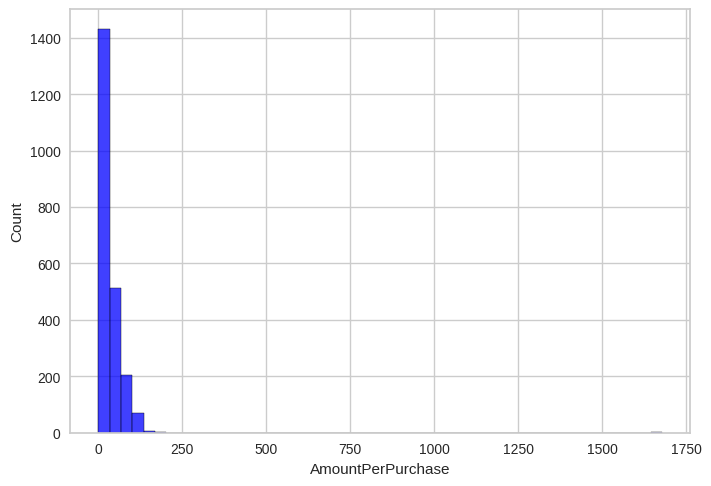

In [ ]:
# Plot the histogram for the AmountPerPurchas variable
sns.histplot(data2['AmountPerPurchase'], bins = 50, color = 'blue')

In [ ]:
columns = ['AmountPerPurchase', 'NumTotalPurchases']
stats = data2[columns].describe()
print(stats)

       AmountPerPurchase  NumTotalPurchases
count        2227.000000        2227.000000
mean           33.274270          14.882353
std            45.040897           7.612563
min             0.533333           1.000000
25%             9.714286           8.000000
50%            23.352941          15.000000
75%            45.281773          21.000000
max          1679.000000          43.000000


#### **Observations and Insights:**
From the histogram, we can see there is one outlier with an AmountPerPurchase of 1679. The rest of the data falls between ~0.533 and less than 250. From the distribution of values, we can see that 75% of the data lies between 0.533 and 45.31.

### **Imputing Missing Values**

In [ ]:
# Impute the missing values for the Income variable with the median
# we have alrady imputed the missing values in an earlier step

In [ ]:
data2['Income'].describe()

count      2227.000000
mean      51662.106870
std       20561.306148
min        1730.000000
25%       35482.000000
50%       51381.500000
75%       68118.000000
max      113734.000000
Name: Income, dtype: float64

**Now that we are done with data preprocessing, let's visualize new features against the new income variable we have after imputing missing values.**

### **Income Vs Expenses**

Text(0, 0.5, 'Expenses')

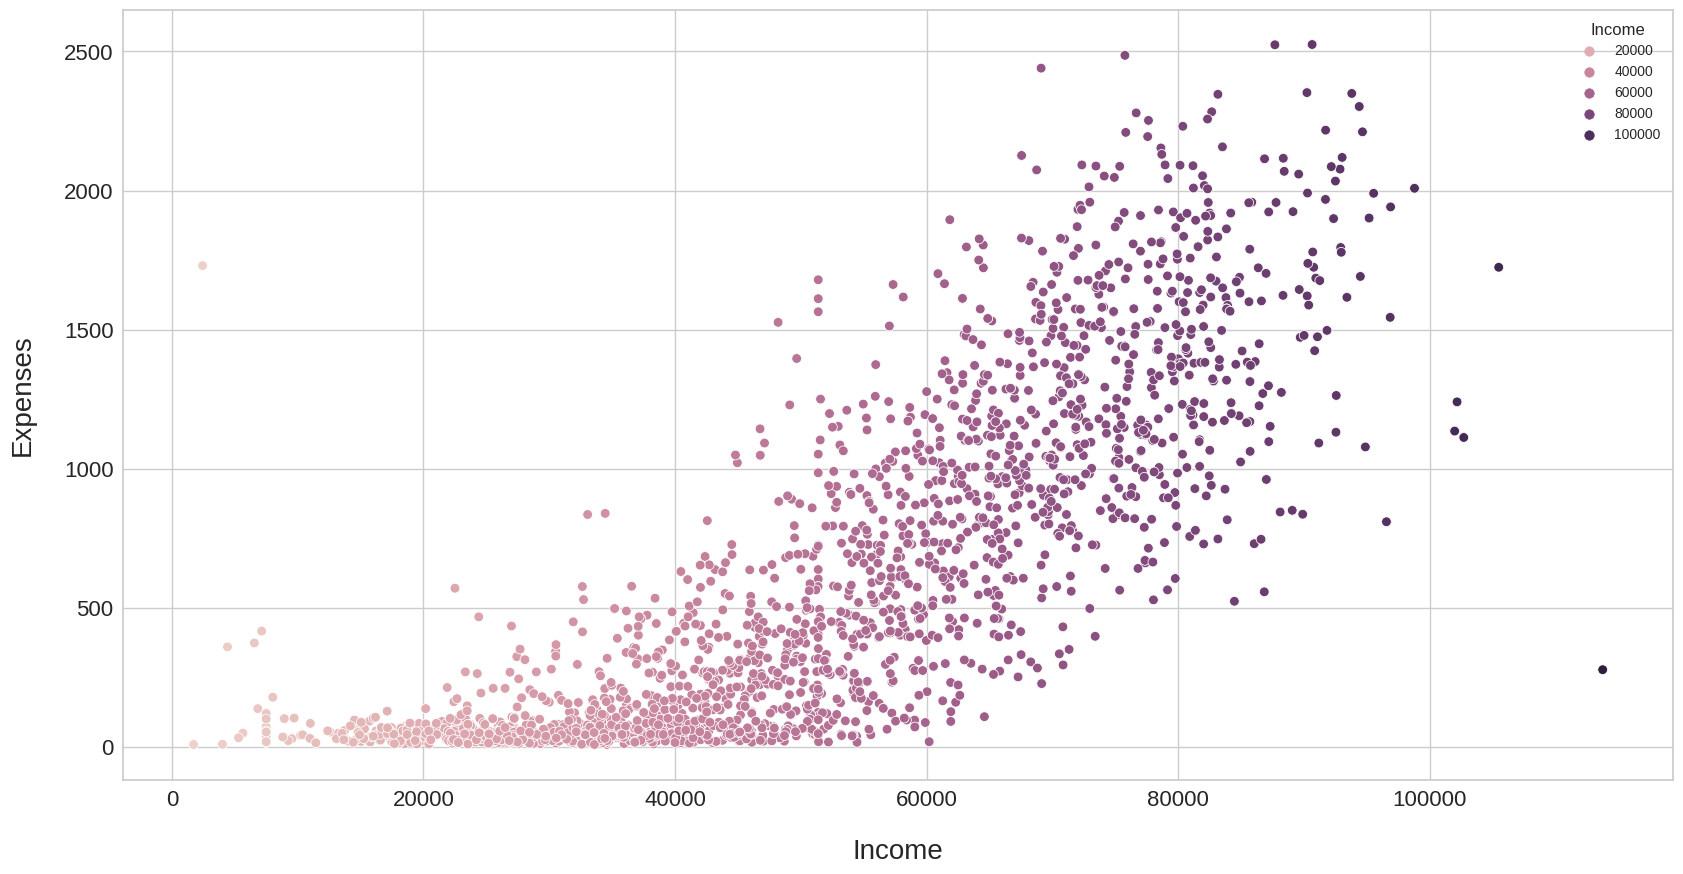

In [ ]:
# Plot the scatter plot with Expenses on Y-axis and Income on X-axis

plt.figure(figsize=(20, 10))                                    # Setting the plot size

sns.scatterplot(data=data2, x = 'Income', y = 'Expenses', hue='Income') # Hint: Use sns.scatterplot()

plt.xticks(fontsize=16)                                         # Font size of X-label

plt.yticks(fontsize=16)                                         # Font size of Y-label

plt.xlabel("Income", fontsize=20, labelpad=20)                  # Title of X-axis

plt.ylabel("Expenses", fontsize=20, labelpad=20)                # Title of Y-axis

#### **Observations and Insights:**
* The scatterplot reflects what we saw in the summary statistics for the dataframe data_dropped['Income']. That is, 50% of the data lies between 35,528 and 68,118.
* The general trend of the scatterplot is that as income increases, so do expenses. There appears to be a strong positive correlation between Income and Expenses. That is, as one variable rises, the other does as well.  

### **Family Size Vs Income**

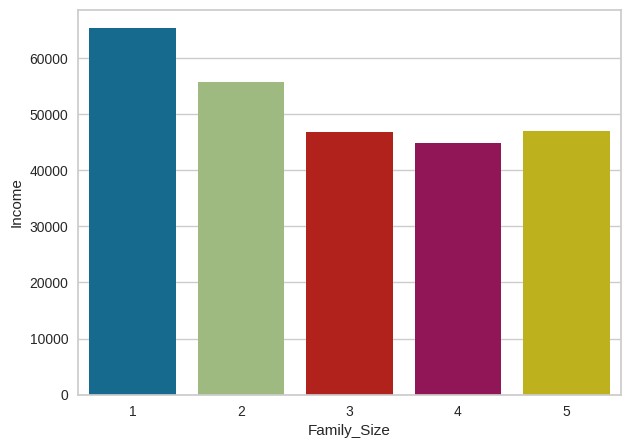

In [ ]:
# Plot the bar plot for Family Size on X-axis and Income on Y-axis
plt.figure(figsize=(7, 5))
sns.barplot(data=data2, x = 'Family_Size', y = 'Income', ci = None)
plt.show()

#### **Observations and Insights:**
* The family size of 1 has the greatest income.
* The family size of 4 has the least income.
* Interestingly, the family size of 3 and 5 have similar incomes.

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

* We dropped the ID column because the number of unique vaules were equal to the number of observations. We concluded that ID was an index for the data entry and would not be useful in providing predictive power for our analysis.
* We had 24 missing values that we imputed for Income. We used the median value for Income to impute the missing values.
* The minimum birth year for one observation was 1893.
* The average amount of wine products and meat products purchased exceeds that of fruits, sweets and fish products.
* The average number of children and teens at home is less than 1
* One observation was for a single purchase in the amount of 1679. This is an outlier
* Most purchases are between ~9 and ~45 dollars (USD assumed)
* From the Income and Expenses scatterplot, we see that, in general, as income increases so do expenses
* Customers with a family size of 1 appear to have the highest incomes.
* Customers with a family size of 4 appear to have the lowest incomes.
* Most of the customers are married
* There seems to be a strong positive correlation with the amount of income and amount of items purchased (ie, MntWines, MntFruits, etc)
* There seems to be a negative correlation between kidhome and amount of items purchased
* There seems to be some positive correlations between which types of items were pruchased, ie, fruit and fish have a strong positive correlation, and meat and wine have a strong positive correlation
* The age of the customers is between 20 and about 76, with the majority between late thirties and early fifties.




## Preparing Data for Segmentation

### Dropping columns that we will not use for segmentation

The decision about which variables to use for clustering is a critically important decision that will have a big impact on the clustering solution. So we need to think carefully about the variables we will choose for clustering. Clearly, this is a step where a lot of contextual knowledge, creativity, and experimentation/iterations are needed.

Moreover, we often use only a few of the data attributes for segmentation (the segmentation attributes) and use some of the remaining ones (the profiling attributes) only to profile the clusters. For example, in market research and market segmentation, we can use behavioral data for segmentation (to segment the customers based on their behavior like amount spent, units bought, etc.), and then use both demographic as well as behavioral data for profiling the segments found.

Here, we will use the behavioral attributes for segmentation and drop the demographic attributes like Income, Age, and Family_Size. In addition to this, we need to drop some other columns which are mentioned below.

* `Dt_Customer`: We have created the `Engaged_in_days` variable using the Dt_Customer variable. Hence, we can drop this variable as it will not help with segmentation.
* `Complain`: About 95% of the customers didn't complain and have the same value for this column. This variable will not have a major impact on segmentation. Hence, we can drop this variable.
* `day`:  We have created the `Engaged_in_days` variable using the 'day' variable. Hence, we can drop this variable as it will not help with segmentation.
* `Status`: This column was created just to get the `Family_Size` variable that contains the information about the Status. Hence, we can drop this variable.
* We also need to drop categorical variables like `Education` and `Marital_Status`, `Kids`, `Kidhome`, and `Teenhome` as distance-based algorithms cannot use the default distance like Euclidean to find the distance between categorical and numerical variables.
* We can also drop categorical variables like `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, and `Response` for which we have create the variable `TotalAcceptedCmp` which is the aggregate of all these variables.

In [ ]:
# Dropping all the irrelevant columns and storing in data_model
data_model = data2.drop(
    columns=[
        "Year_Birth",
        "Dt_Customer",
        "day",
        "Complain",
        "Response",
        "AcceptedCmp1",
        "AcceptedCmp2",
        "AcceptedCmp3",
        "AcceptedCmp4",
        "AcceptedCmp5",
        "Marital_Status",
        "Status",
        "Kids",
        'Education',
        'Kidhome',
        'Teenhome', 'Income','Age', 'Family_Size'
    ],
    axis=1,
)

In [ ]:
# Check the shape of new data
data_model_shape = data_model.shape
print(data_model_shape)

(2227, 17)


In [ ]:
# Check first five rows of new data
data_model.head()

Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Expenses  \
0                   10                  4                  7      1617   
1                    1                  2                  5        27   
2                    2                 10                  4       776   
3                    0                  4                  6        53   
4                    3                  6                  5       422   

   NumTotalPurchases  Engaged_in_days  TotalAcceptedCmp  AmountPerPurchase  
0                 25              997                 1          64.680000  
1                  6              151                 0           4.500000  
2                 21              498                 0          36.952381  
3                  8               91                 0           6.625000  
4                 19              347                 0          22.210526

**Let's plot the correlation plot after we've removed the irrelevant variables.**

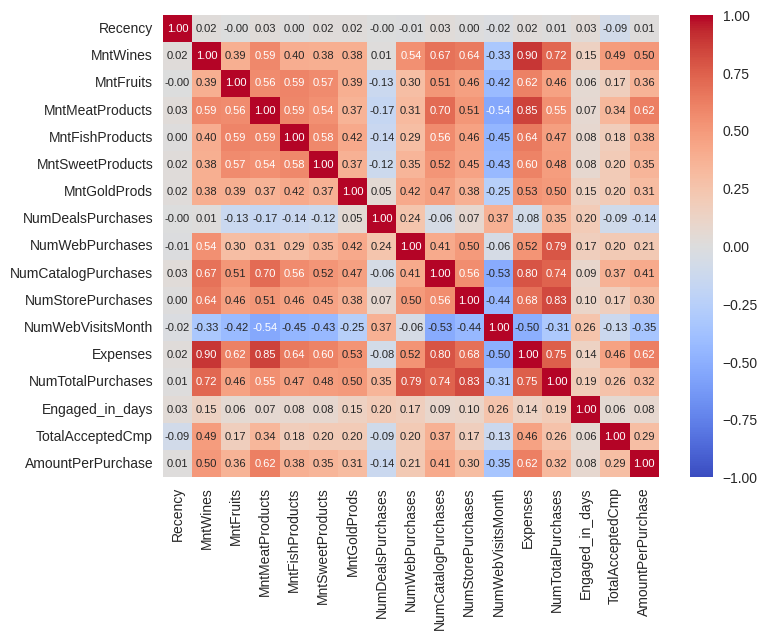

In [ ]:
# Plot the correlation plot for new data
correlation_matrix = data_model.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, vmin = -1, vmax = 1, cmap="coolwarm", fmt=".2f", annot_kws={'size':8})

plt.show()

**Observations and Insights:**

Strong positive correlations:
* Wine and Expenses has a VERY strong positive correlation
* Wine and meat
* Wine and catalog purchases
* Wine and store purchases
* Meat and Expenses has a very strong positive correlation
* Meat and catalog purchases
* Meat and Amount Per Purchase
* Web purchases and total purchases has a very strong correlation
* Catalog purchases and Expenses has a very strong positive correlation, as does catalog purchases and total purchases, and basically all the Expenses and means of purchasing


Strong negative correlations:
* Web visits per month and expenses
* Web visits per month and purchase behavior

It seems that the more web visits there are the fewer items are purchased. Is this due to the website design and user experience?

### Scaling the Data

**What is feature scaling?**

Feature scaling is a class of statistical techniques that, as the name implies, scales the features of our data so that they all have a similar range. You'll understand better if we look at an example:

If you have multiple independent variables like Age, Income, and Amount related variables, with their range as (18–100 Years), (25K–75K), and (100–200), respectively, feature scaling would help them all to be in the same range.

**Why feature scaling is important in Unsupervised Learning?**

Feature scaling is especially relevant in machine learning models that compute some sort of distance metric as we do in most clustering algorithms, for example, K-Means.

So, scaling should be done to avoid the problem of one feature dominating over others because the unsupervised learning algorithm uses distance to find the similarity between data points.

**Let's scale the data**

**Standard Scaler**: StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

![SC.png](attachment:SC.png)

1. Data standardization is the process of rescaling the attributes so that they have a mean of 0 and a variance of 1.
2. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.
3. In sklearn.preprocessing.StandardScaler(), centering and scaling happen independently on each feature.

In [ ]:
# Applying standard scaler on new data
scaler = StandardScaler()                                                  # Initialize the Standard Scaler

df_scaled = scaler.fit_transform(data_model)                                     # fit_transform the scaler function on new data

df_scaled = pd.DataFrame(df_scaled, columns=data_model.columns)      # Converting the embeddings to a dataframe

df_scaled.head()

Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.306906  0.979274   1.549793         1.735137         2.455586   
1 -0.384035 -0.873925  -0.638021        -0.726901        -0.652191   
2 -0.798600  0.358572   0.569049        -0.175222         1.340442   
3 -0.798600 -0.873925  -0.562579        -0.663070        -0.505942   
4  1.550599 -0.392806   0.418165        -0.216256         0.152175   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0          1.471064      0.841828           0.357919         1.404892   
1         -0.633425     -0.732464          -0.169952        -1.119121   
2         -0.149634     -0.041311          -0.697824         1.404892   
3         -0.585045     -0.751662          -0.169952        -0.758548   
4         -0.004497     -0.559676           1.413662         0.323172   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Expenses  \
0             2.633008          -0.561330           0.696875  1.682349   
1            -0.586255          -1.178960          -0.135935 -0.963691   
2            -0.228559           1.291559          -0.552339  0.282777   
3            -0.943951          -0.561330           0.280470 -0.920422   
4             0.129137           0.056299          -0.135935 -0.306341   

   NumTotalPurchases  Engaged_in_days  TotalAcceptedCmp  AmountPerPurchase  
0           1.329371         1.975678          0.619416           0.697428  
1          -1.167064        -1.667464         -0.503906          -0.638991  
2           0.803806        -0.173173         -0.503906           0.081680  
3          -0.904281        -1.925843         -0.503906          -0.591801  
4           0.541023        -0.823427         -0.503906          -0.245693

## **Applying T-SNE and PCA to the data to visualize the data distributed in 2 dimensions**

### **Applying T-SNE**

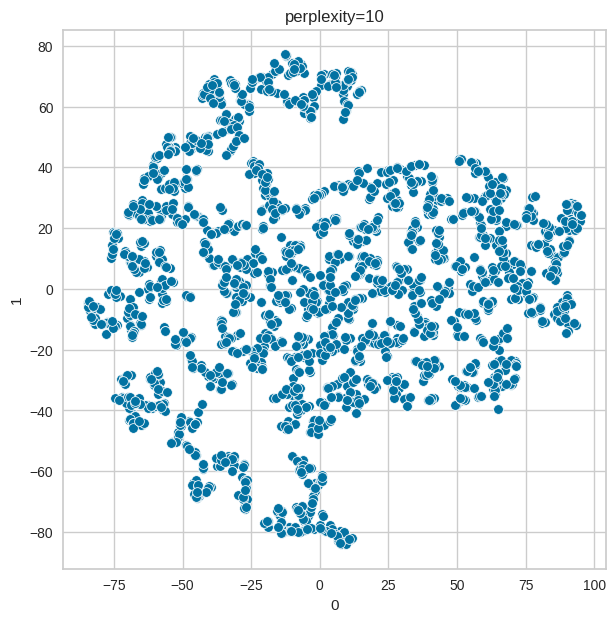

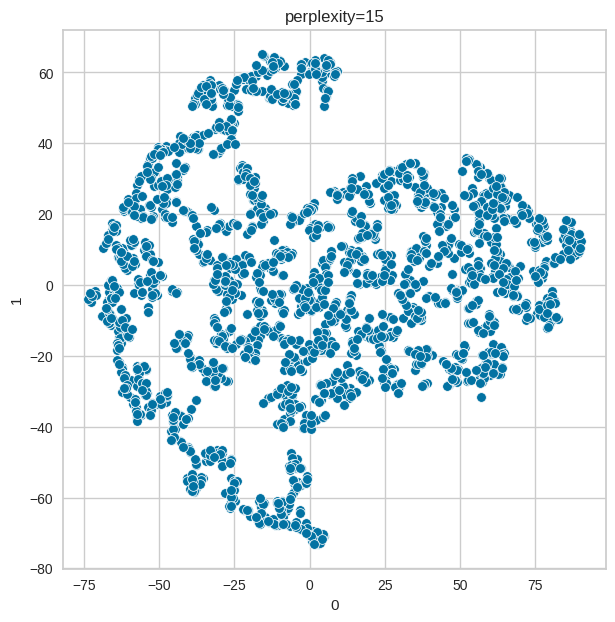

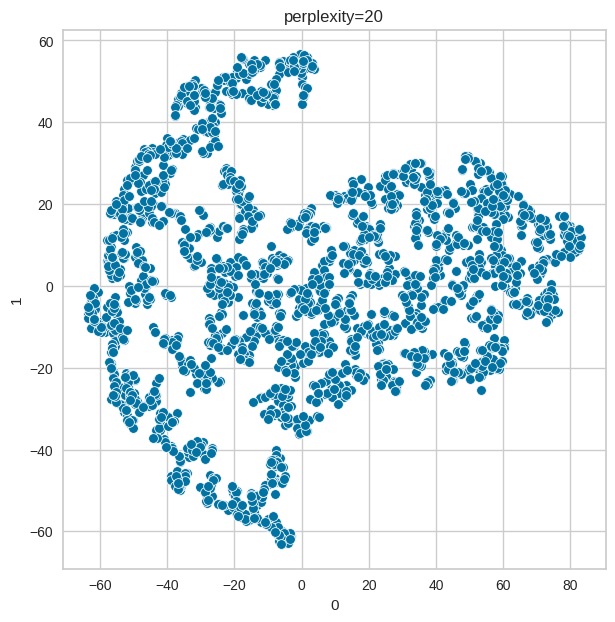

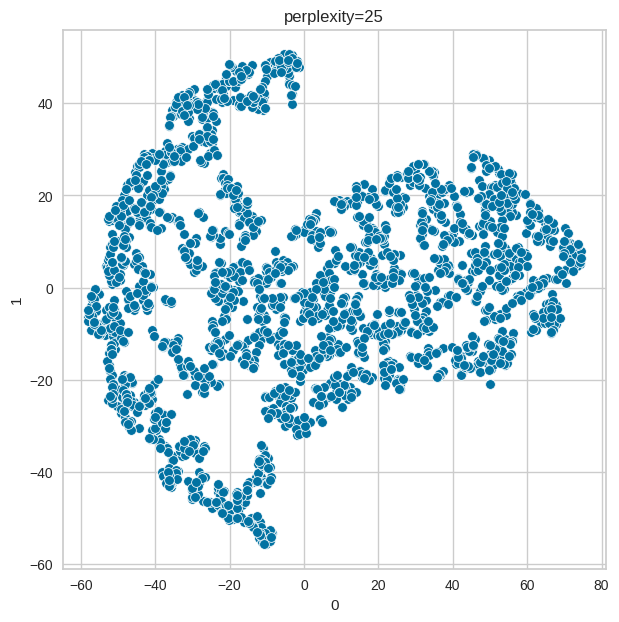

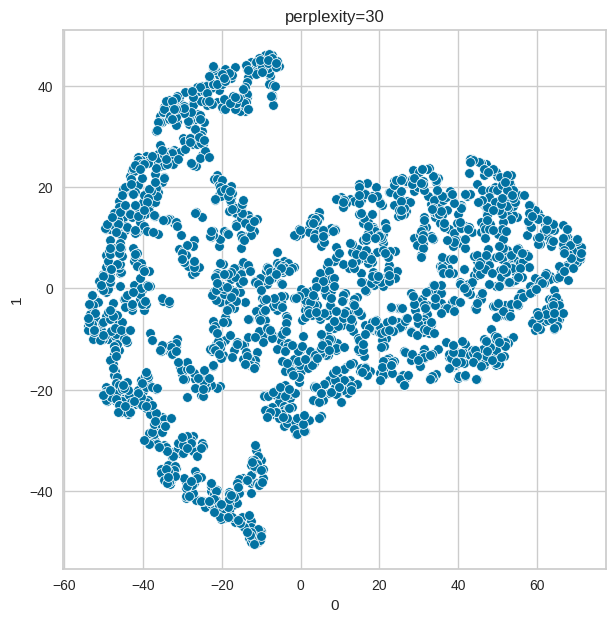

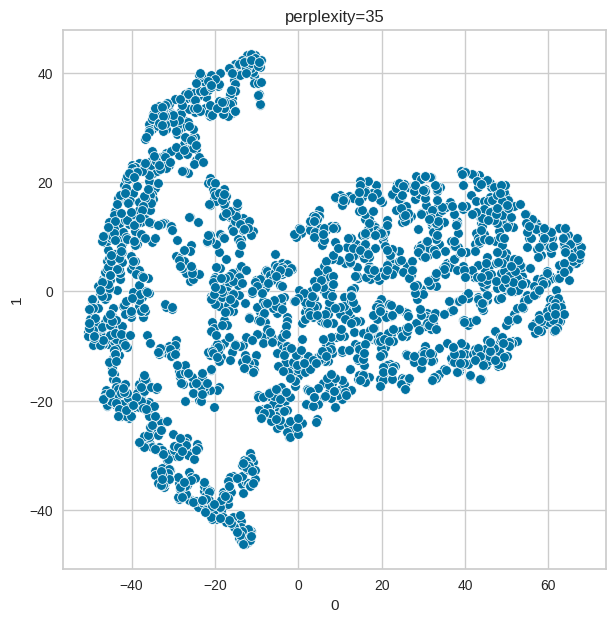

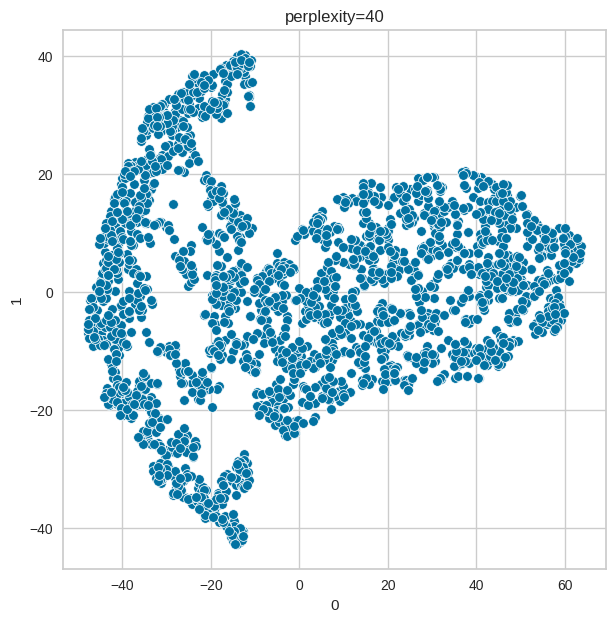

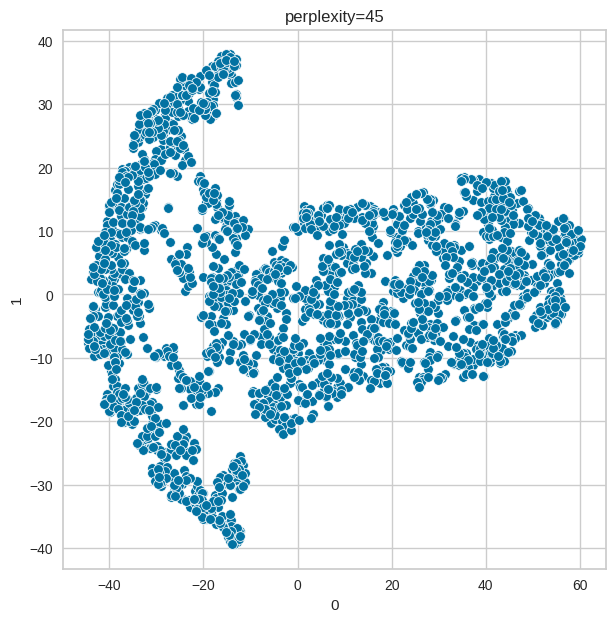

In [ ]:
# Fitting T-SNE with number of components equal to 2 to visualize how data is distributed
for i in range(10, 50, 5):
  tsne = TSNE(n_components=2, random_state=1, perplexity=i)        # Initializing T-SNE with number of component equal to 2, random_state=1, and perplexity=35

  data_tsne = tsne.fit_transform(data_model)                          # fit_transform T-SNE on new data

  data_tsne = pd.DataFrame(data_tsne, columns=[0, 1])           # Converting the embeddings to a dataframe

  plt.figure(figsize=(7, 7))                                                    # Scatter plot for two components

  sns.scatterplot(x=0, y=1, data=data_tsne)

  plt.title("perplexity={}".format(i))                             # Plotting T-SNE

**Observation and Insights:**

### **Applying PCA**

**Think about it:**
- Should we apply clustering algorithms on the current data or should we apply PCA on the data before applying clustering algorithms? How would this help?

When the variables used in clustering are highly correlated, it causes multicollinearity, which affects the clustering method and results in poor cluster profiling (or biased toward a few variables). PCA can be used to reduce the multicollinearity between the variables.

In [ ]:
# Defining the number of principal components to generate
n = data_model.shape[1]                                        # Storing the number of variables in the data

pca = PCA(n_components = n, random_state=1)                                        # Initialize PCA with n_components = n and random_state=1

data_pca = pd.DataFrame(pca.fit_transform(data_model))                      # fit_transform PCA on the scaled data

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_

In [ ]:
data_pca.head()

0           1           2          3          4          5   \
0  1143.833434 -374.740726  245.120411 -52.736104 -46.255604  -6.629717   
1  -691.118387  350.954473  -36.458247  11.846336  -2.419434  -2.320303   
2   190.221223   39.655515  -80.547719 -65.620225 -43.711598  18.509999   
3  -667.756578  413.542803  -29.397353   7.216826  -6.515200  -0.173235   
4  -237.967662  182.245738   14.531771 -16.725547 -28.247908   0.992360   

          6          7          8         9         10        11        12  \
0 -26.943586  -9.549894  -0.826050 -0.716052  5.537879  4.792047 -0.052493   
1  -2.448284   8.802027   2.263442 -2.810533  0.153817  1.147452 -0.642126   
2 -41.357221  19.430069 -12.728874  5.322248 -0.841924 -2.330536  3.050269   
3  -6.028190  20.076938   3.750472 -0.270062  0.572616 -0.942312 -0.620211   
4   7.984811 -43.285743 -20.453227  7.536863  1.251177  1.003579 -1.152922   

         13        14            15            16  
0  1.494369 -0.485197  9.508173e-13 -1.384436e-15  
1 -0.476443 -0.233541 -3.385545e-13  5.891675e-14  
2 -0.008280 -0.218862  8.941762e-13  4.360422e-15  
3  0.304687 -0.128782  2.712428e-13 -1.378973e-15  
4 -1.055564  0.091454  4.845370e-13 -6.000402e-15

**Let's plot the first two components and see how the data points are distributed.**

<Axes: xlabel='1', ylabel='0'>

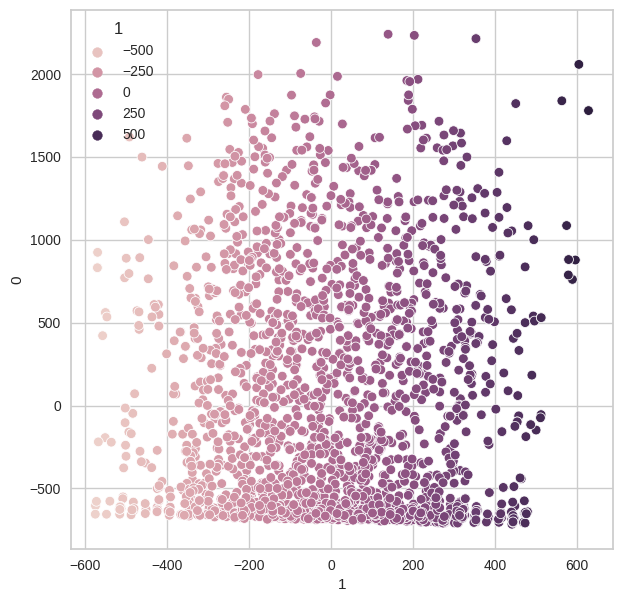

In [ ]:
# Scatter plot for two components using the dataframe data_pca
plt.figure(figsize=(7, 7))                                                    # Scatter plot for two components

sns.scatterplot(x=1, y=0, data=data_pca, hue = 1 )

**Let's apply clustering algorithms on the data generated after applying PCA**

## **K-Means**

In [ ]:
distortions = []                                                  # Create an empty list

K = range(2, 10)                                                  # Setting the K range from 2 to 10

for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=4)              # Initialize K-Means
    kmeanModel.fit(data_pca)                                      # Fit K-Means on the data
    distortions.append(kmeanModel.inertia_)                       # Append distortion values to the empty list created above

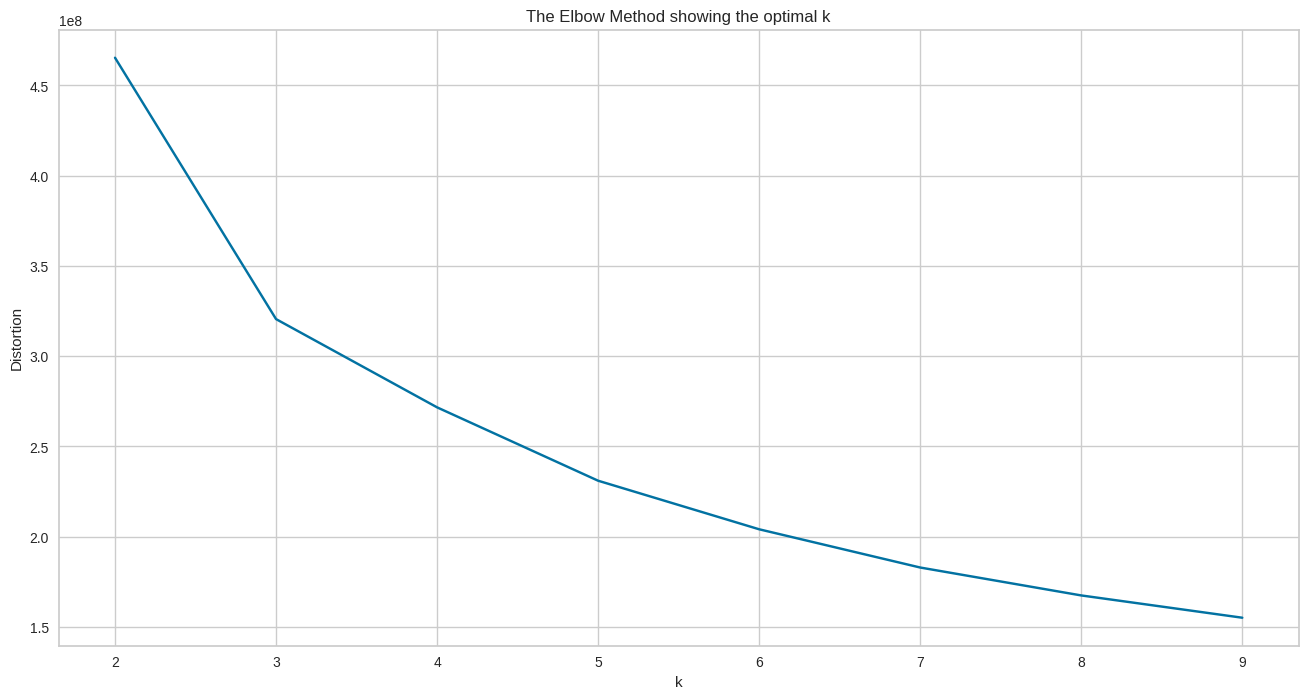

In [ ]:
# Plotting the elbow plot
plt.figure(figsize=(16, 8))                                            # Setting the plot size

plt.plot(K, distortions, "bx-")                                        # Plotting the K on X-axis and distortions on y-axis

plt.xlabel("k")                                                        # Title of x-axis

plt.ylabel("Distortion")                                               # Title of y-axis

plt.title("The Elbow Method showing the optimal k")                    # Title of the plot
plt.show()

**In the above plot, the elbow is seen for K=3 and K=5 as there is some drop in distortion at K=3 and K=5.**

**Think About It:**

- How do we determine the optimal K value when the elbows are observed at 2 or more K values from the elbow curve?
- Which metric can be used to determine the final K value?

**We can use the silhouette score as a metric for different K values to make a better decision about picking the number of clusters(K).**

### **What is the silhouette score?**

Silhouette score is one of the methods for evaluating the quality of clusters created using clustering algorithms such as K-Means. The silhouette score is a measure of how similar an object is to its cluster (cohesion) compared to other clusters (separation). Silhouette score has a range of [-1, 1].

* Silhouette coefficients near +1 indicate that the clusters are dense and well separated, which is good.
* Silhouette score near -1 indicates that those samples might have been assigned to the wrong cluster.

**Finding silhouette score for each value of K**

In [ ]:
sil_score = []                                                             # Creating empty list
cluster_list = range(1, 11)                                                 # Creating a range from 3 to 7
for n_clusters in cluster_list:

    # Initialize K-Means with number of clusters equal to n_clusters and random_state=1
    clusterer = KMeans(n_clusters = k, random_state=1).fit(data_pca)

    # Fit and predict on the pca data
    preds = clusterer.predict(data_pca)

    # Calculate silhouette score - Hint: Use silhouette_score() function
    score = silhouette_score(data_pca,preds)

    # Append silhouette score to empty list created above
    sil_score.append(score)

    # Print the silhouette score
    print( "For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 1, the silhouette score is 0.32837242830370467)
For n_clusters = 2, the silhouette score is 0.32837242830370467)
For n_clusters = 3, the silhouette score is 0.32837242830370467)
For n_clusters = 4, the silhouette score is 0.32837242830370467)
For n_clusters = 5, the silhouette score is 0.32837242830370467)
For n_clusters = 6, the silhouette score is 0.32837242830370467)
For n_clusters = 7, the silhouette score is 0.32837242830370467)
For n_clusters = 8, the silhouette score is 0.32837242830370467)
For n_clusters = 9, the silhouette score is 0.32837242830370467)
For n_clusters = 10, the silhouette score is 0.32837242830370467)


**From the above silhouette scores, 3 appears to be a good value of K. So, let's build K-Means using K=3.**

### **Applying K-Means on data_pca**

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 1)                           # Initialize the K-Means algorithm with 3 clusters and random_state=1

kmeans.fit(data_pca)                                     # Fitting on the data_pca

KMeans(n_clusters=3, random_state=1)

In [ ]:
data_pca["K_means_segments_3"] = kmeans.labels_                    # Adding K-Means cluster labels to the data_pca data

data2["K_means_segments_3"] = kmeans.labels_                        # Adding K-Means cluster labels to the whole data

data_model["K_means_segments_3"] = kmeans.labels_                  # Adding K-Means cluster labels to data_model

In [ ]:
# Let's check the distribution
data_model["K_means_segments_3"].describe()

count    2227.000000
mean        1.286484
std         0.865954
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: K_means_segments_3, dtype: float64

**Let's visualize the clusters using PCA**

In [ ]:
# Function to visualize PCA data with clusters formed
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

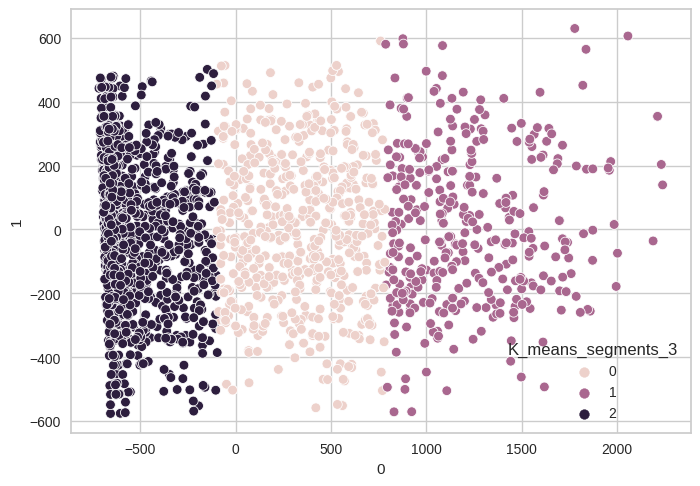

In [ ]:
PCA_PLOT(0, 1, data_pca, "K_means_segments_3")

**Observations and Insights:**
*It appears that we have three groups, one between -600 and -1, antoher between -1 and 600, and the last between 800 and 2500.

### **Cluster Profiling**

In [ ]:
# Taking the cluster-wise mean of all the variables. Hint: First groupby 'data' by 'K_means_segments_3' and then find mean
cluster_profile_KMeans_3 = data2.groupby('K_means_segments_3').mean(numeric_only = True)

In [ ]:
# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_KMeans_3.style.highlight_max(color="darkgreen", axis=0)

**Observations and Insights:**
* Most of the customers have been grouped into the first two segments.
* Cluster 1 has the highest average income, had the most purchases in all categories, had the most catalog purchases, and had the highest offer acceptance rates for all campaigns, had the highest expenses, the smallest family size, and spent the most per purchase. This group may be older adults who are "empty-nesters", or who have grown adult children. Or, it may be that many of these customers do not have any children. These customers may have higher incomes because they have been in the workforce longer. Because they have fewer children in the home, they may be more likely to purchase adult food and beverages such as fish, meat and wine. Purchasing fine foods such as these will drive up the cost of each purchase, and we can see that this cluster has the highest amount per purchase.
* Cluster 2 has the youngest customers, with the year of birth averaging around 1970. This cluster has the most children in the home, most web visits, most complaints, the fewest number of purchases, and the least amount of income. This cluster may contain customers who are young parents. They may have been in the workforce for less time than the customers in cluster 1. The amount per purchase for this cluster is the smallest of the three clusters. This may indicate that these customers are on tight budgets, which would make sense because the average income is less than $38,000.
* Cluster 3 has the oldest average age of customer. This cluster has the most teens in the home, the most number of deals, the most web purchases, and ultimately the most purchases in general. This cluster may contain customers who are middle-aged with teenagers. Teenagers tend to eat a lot, which means more grocery shopping for the parents, and, in turn, more expenditures at the store.


**Let us create a boxplot for each of the variables**

In [ ]:
# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']

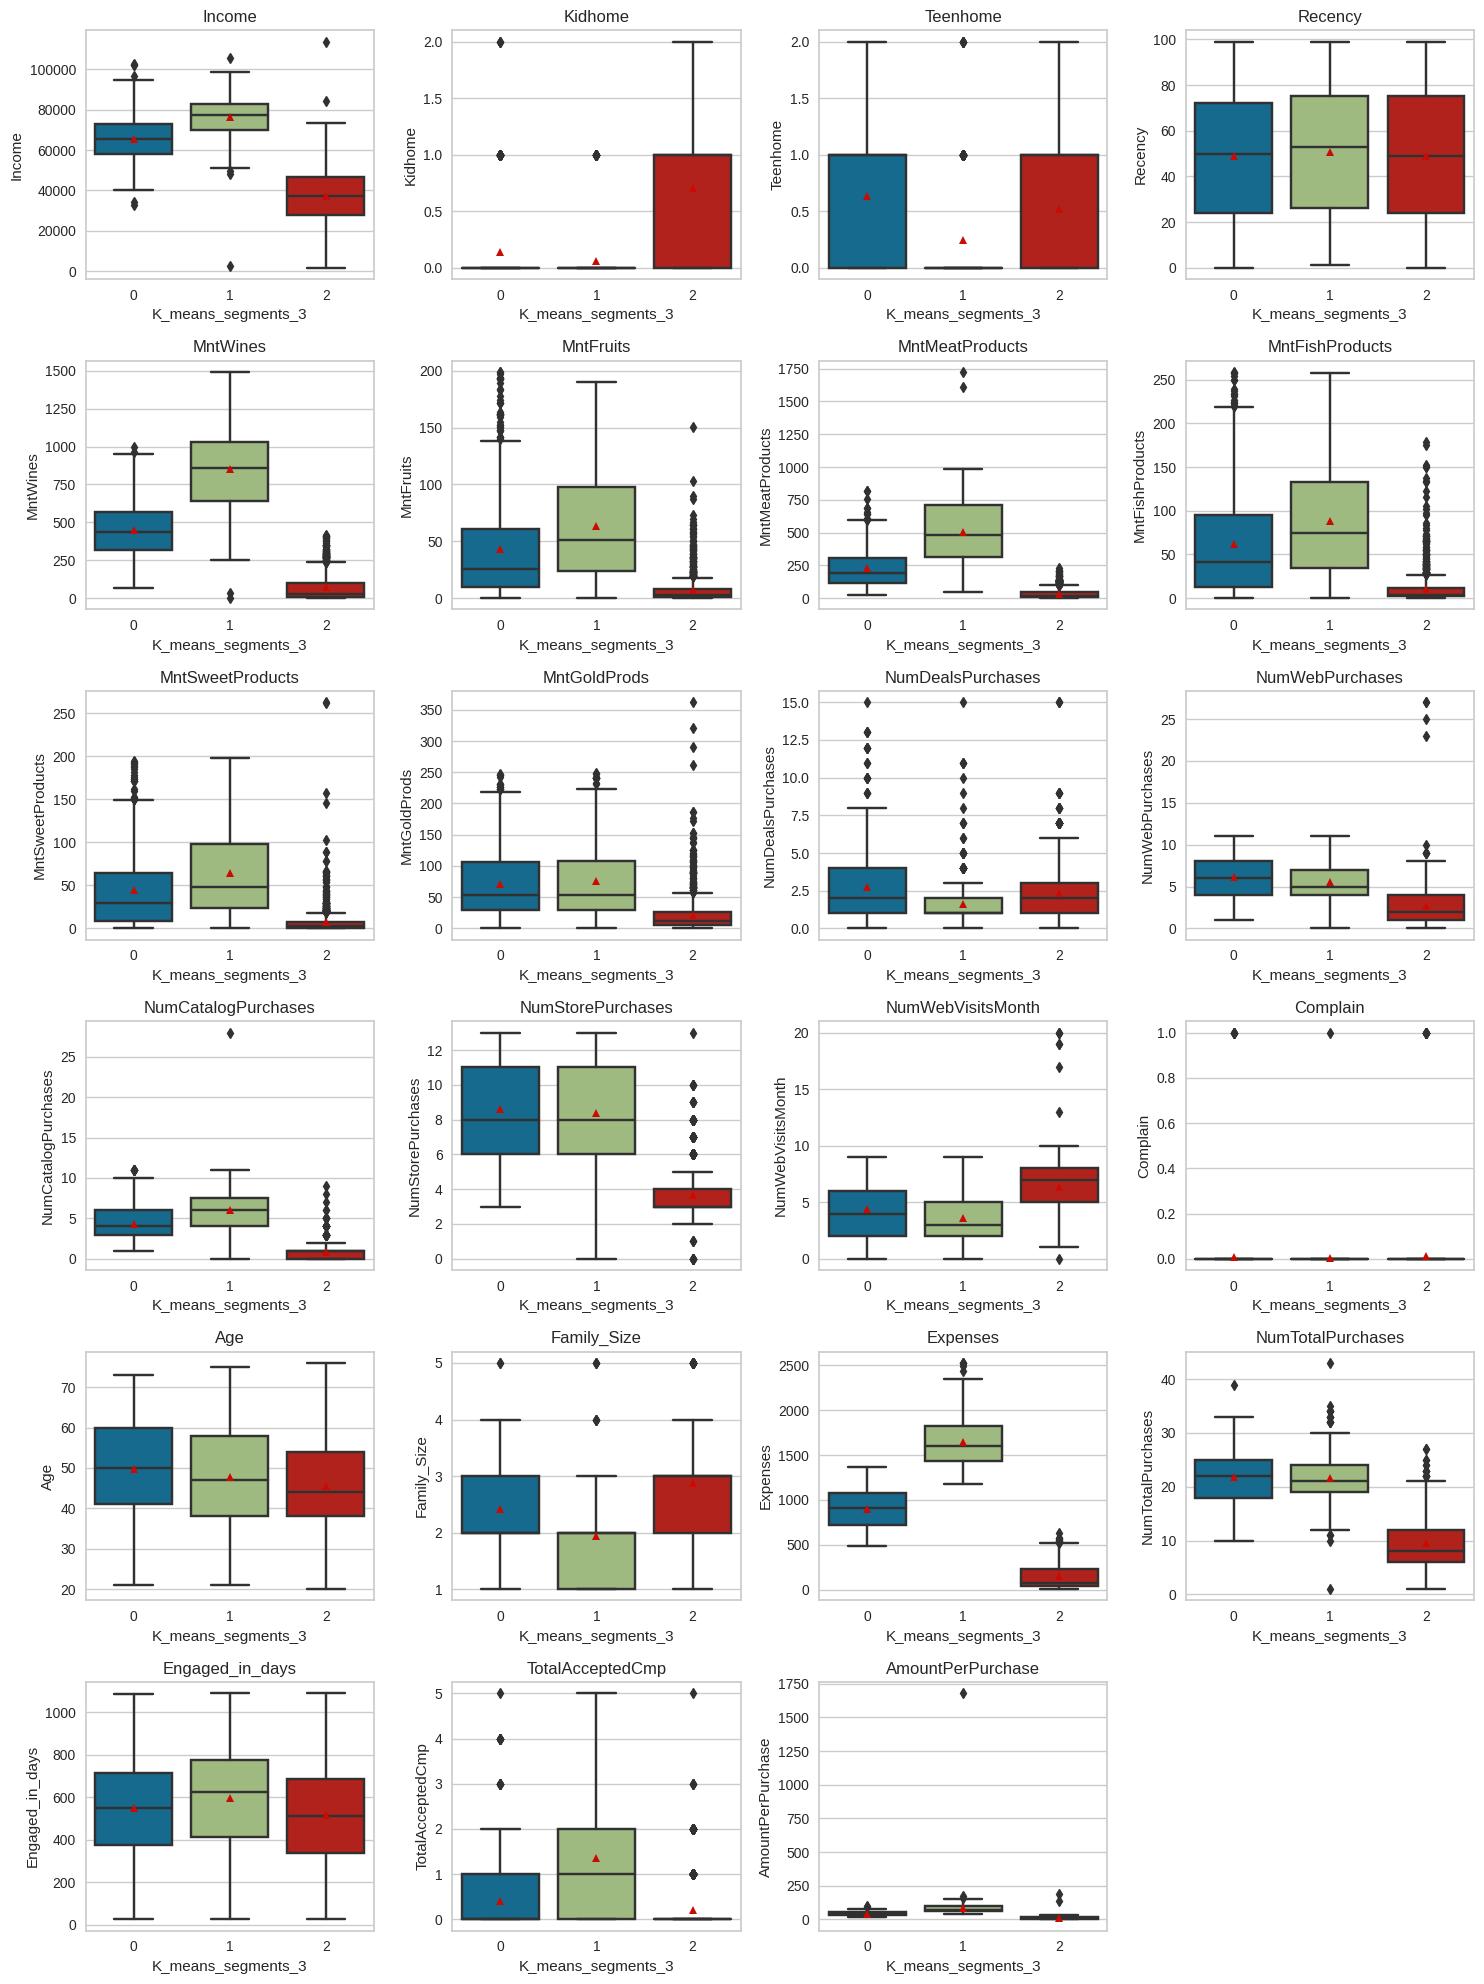

In [ ]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (15, 20))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)

    sns.boxplot(y=data2[variable], x=data2['K_means_segments_3'],showmeans=True)

    plt.tight_layout()

    plt.title(variable)

plt.show()

### **Characteristics of each cluster:**



**Cluster 0:__________**

**Summary for cluster 0:** Cluster 0 contains middle-aged customers who tend to purchase fine foods more than the other clusters. These fine foods include meats and wines, among others. This group has the fewest number of children, highest incomes, and highest expenses.  

**Cluster 1:_______________**

**Summary for cluster 1:** Cluster 1 contains middle-aged customers with the largest family size with the most children at home. This cluster has the least amount of income and purchases the fewest fine foods (such as wine and meat). This cluster has the fewest purchases of all the clusters, and their purchase amounts are the least.



**Cluster 2:_______________**

**Summary for cluster 2:** Cluster 2 has the oldest customers (on average). This cluster has the most number of teens in the home, most number of purchases from deals, and highest number of total purchases. The majority of their purchases consist of wines, fruits, fish, and gold products.

**Think About It:**
- Are the K-Means profiles with K=3 providing any deep insights into customer purchasing behavior or which channels they are using?
- What is the next step to get more meaningful insights?

We can see from the above profiles that K=3 segments the customers into High, Medium and Low-income customers, and we are not getting deep insights into different types of customers. So, let's try to build K=5 (which has another elbow in the Elbow curve) and see if we can get better cluster profiles.

In [ ]:
# Dropping labels we got from K=3 since we will be using PCA data for prediction
# Drop K_means_segments_3. Hint: Use axis=1 and inplace=True
data_pca.drop('K_means_segments_3', axis = 1, inplace = True)

data2.drop('K_means_segments_3', axis = 1, inplace = True)

data_model.drop('K_means_segments_3', axis = 1, inplace = True)

**Let's build K-Means using K=5**

In [ ]:
# Fit the K-Means algorithm using number of cluster as 5 and random_state=0 on data_pca
kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans.fit(data_pca)

KMeans(n_clusters=5, random_state=0)

In [ ]:
# Add K-Means cluster labels to data_pca

# Add K-Means cluster labels to whole data

# Add K-Means cluster labels to data_model


data_pca["K_means_segments_5"] = kmeans.labels_

data2["K_means_segments_5"] = kmeans.labels_

data_model["K_means_segments_5"] = kmeans.labels_

In [ ]:
# Let's check the distribution
data_model["K_means_segments_5"].describe()

count    2227.000000
mean        2.058374
std         1.435403
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: K_means_segments_5, dtype: float64

**Let's visualize the clusters using PCA**

In [ ]:
# Hint: Use PCA_PLOT function created above
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

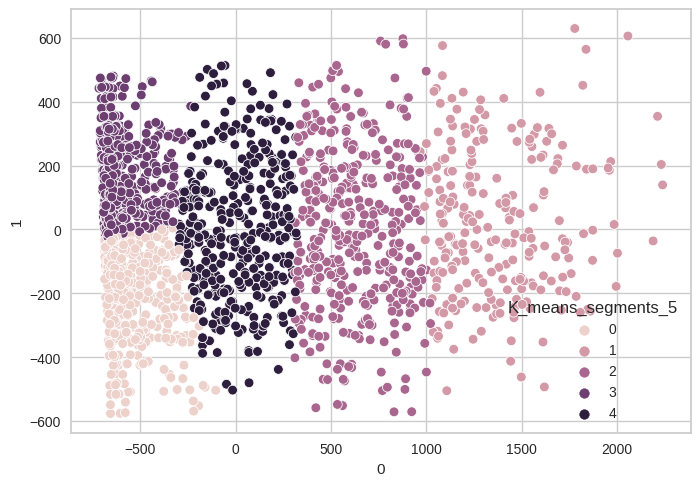

In [ ]:
PCA_PLOT(0, 1, data_pca, "K_means_segments_5")

### **Cluster Profiling**

In [ ]:
# Take the cluster-wise mean of all the variables. Hint: First groupby 'data' by cluster labels column and then find mean
cluster_profile_KMeans_5 = data2.groupby('K_means_segments_5').mean(numeric_only = True)

In [ ]:
# Highlight the maximum average value among all the clusters for each of the variables
cluster_profile_KMeans_5.style.highlight_max(color="darkgreen", axis=0)

**Let's plot the boxplot**

In [ ]:
# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']

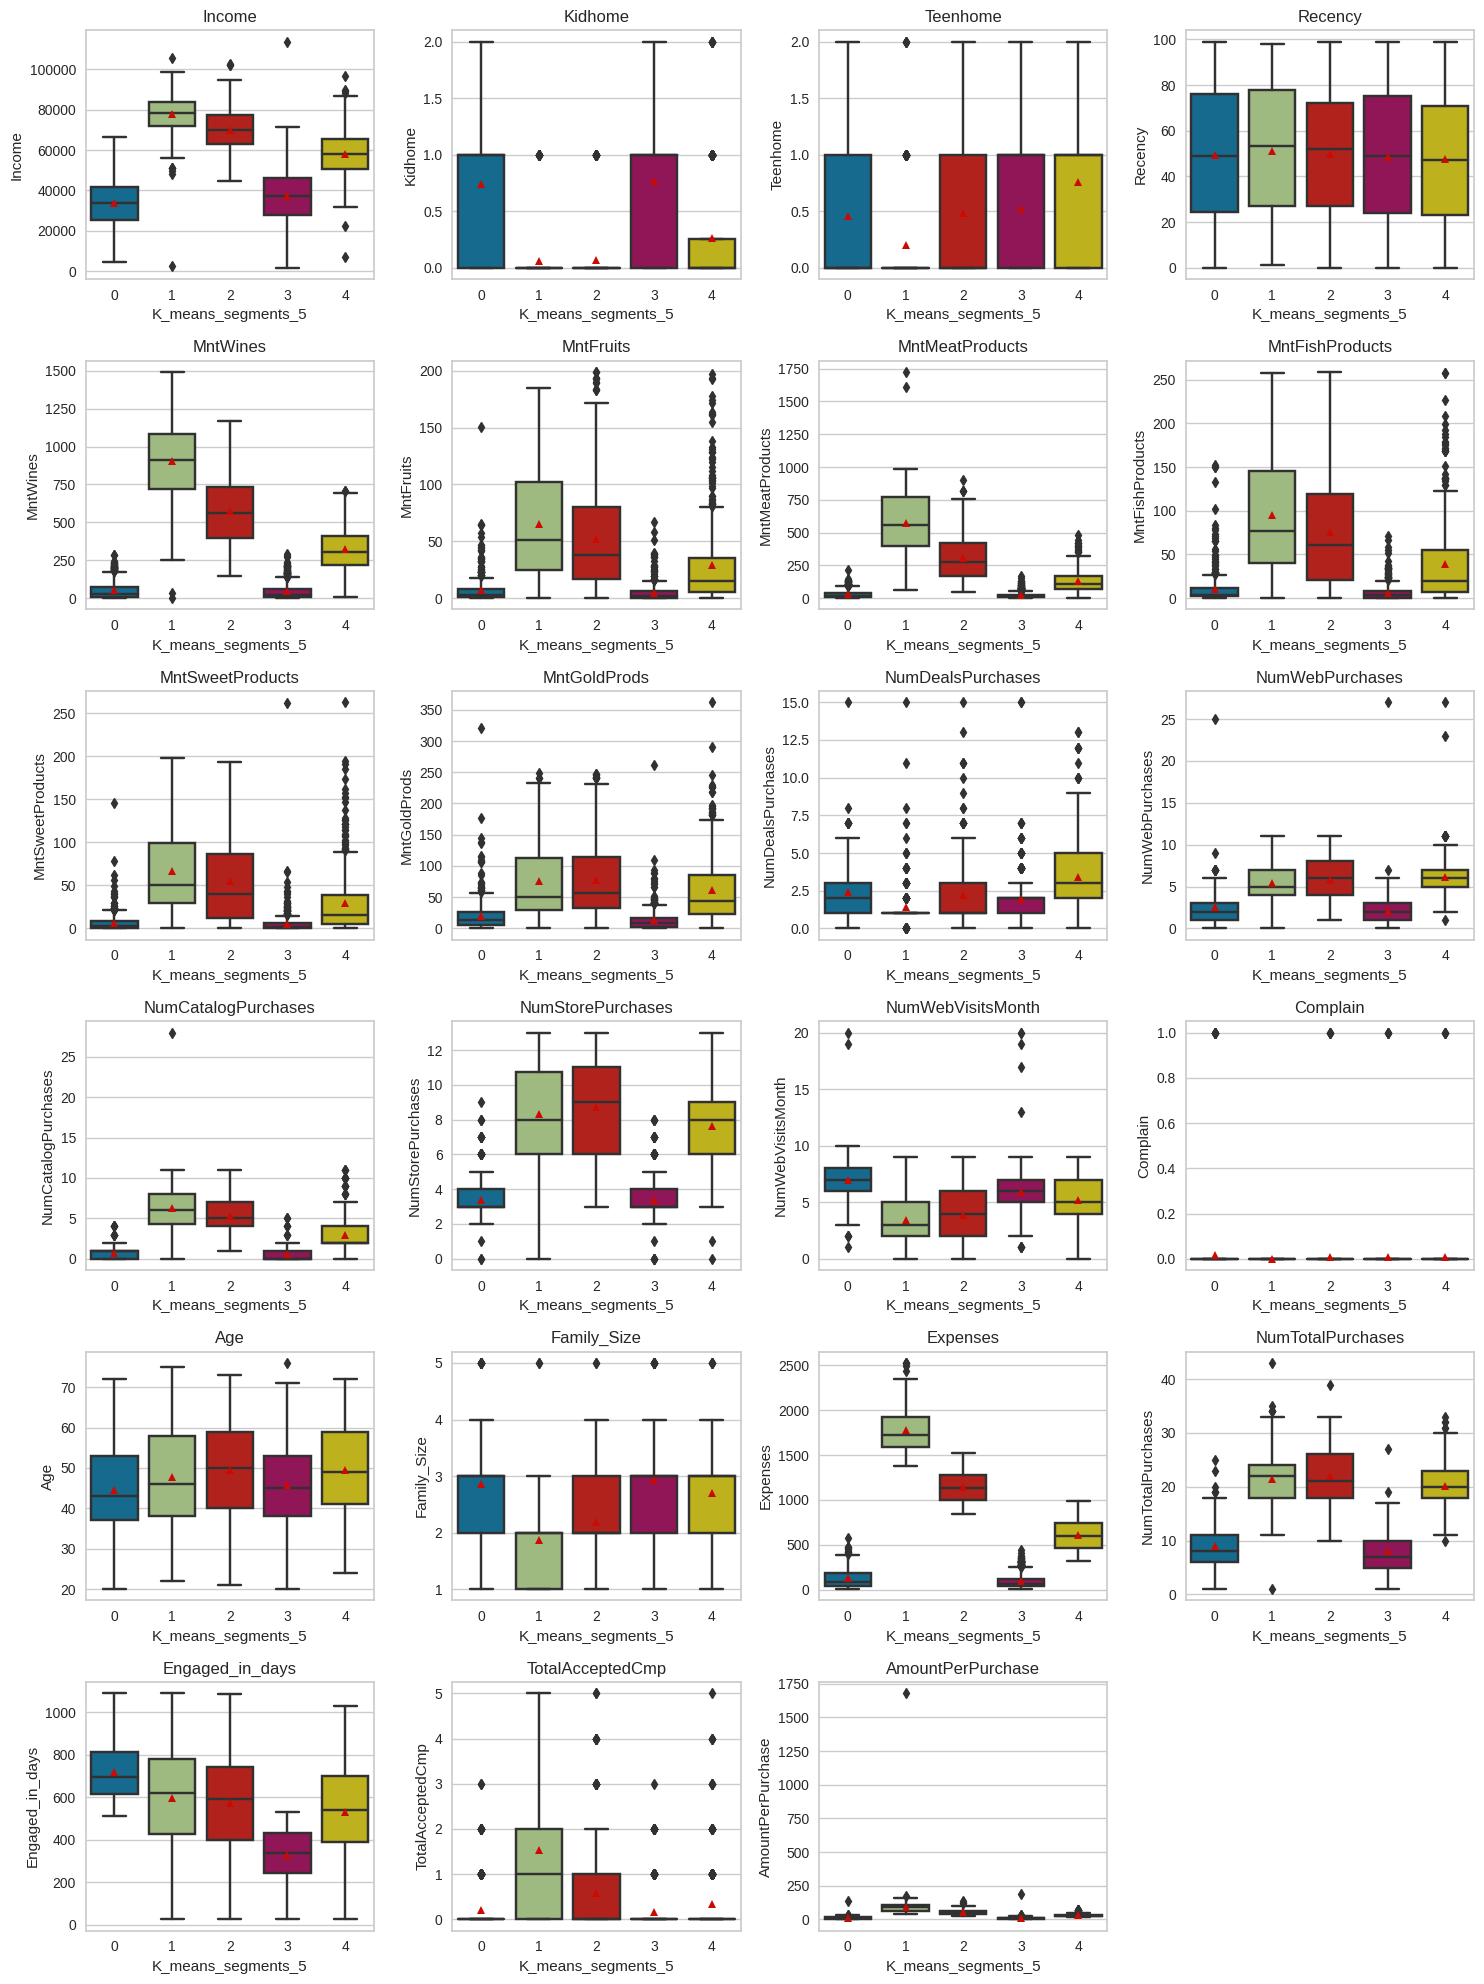

In [ ]:
# Create boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (15, 20))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)

    sns.boxplot(y=data2[variable], x=data2['K_means_segments_5'],showmeans=True)

    plt.tight_layout()

    plt.title(variable)

plt.show()

### **Characteristics of each cluster**

**Cluster 0:** average income for cluster 0 is 80k, which is the highest of the clusters. cluster 0 also doesn't have children or teens. Most recent customer, spend most on wines,meats, and fish. not very many deals purchases, but outliers for numdealspurchases. most average web purchases, catalog purchases, most most variation in store purchases, least average web visits, 0 complaints.The cluster also accepted the most campaigns. They also have the highest amount per purchase. and highest number of expenses.

**Summary for cluster 0:_______________**Dinks or sinks who like fine foods and are willing to pay a premium prices (no need for discounts or deals since they can afford the preimium priced products)

**Cluster 1:** Cluster 1 has the lowest average income, many kids and teens in the house, purchase the fewest products (on average/the mean), use the most deals, have the most web visits, are the youngest (using the average), have the second to least expenses, the most average days engaged, and have one of the least amount per purchase amounts.

**Summary for cluster 1:_______________** Young parents with kids at home. Low income and as a result less is purchased.  


**Cluster 2:** Second to highest purchase amount, second to highest total accepted campaigns, second highest number of expenses, age is on the upper end, at least one complaint, highest number of store purchases (average), the median for Teanhome is likely zero, with a mean of .5., and the kids is median and mean of zero. But the max value for kids is 1. And they have the second to highest median income. median income for this group also happens to be the average income, as is the case for all income values.

**Summary for cluster 2:_______________**

**Cluster 3:** This cluster has a variety of outliers for total accepted campaigns with an average of just under 1. engaged days has an average of less than 600. Total purchases has a median and average of 20. Expenses has an average of of just over 500.This cluster has a family size of slightly less than three, which is the third largest family size. Age is on par with cluster 2. number of web visits per month is average 5 and median 5.Number of store purchases is median 8 and average slightly under 8. Number of catalog purchases is less than 5 on average. Number of web purchases has the largest interquartile range. Because the box is so long that means that the data is more dispersed. The mean number of deals purchased is around 2.4. The sweet products has the second to highest average. this cluster has the third larges average number of purchases for all products. they also have the most number  of deals purchased. They have the highest number of teens in the home, and the third highest income.

**Summary for cluster 3:_______________**

**Cluster 4:**
The fourth cluster has the second lowest income on average. The number of kids is on par with cluster 1, and number of teens on par with clusters 1 and 2. The purchases for all products is on par with cluster 1, except cluster 1 has slightly more purchases. In fact, cluster 1 and cluster 4 seem to be very similar in most aspects, except engaged in days (lower for cluster 4), Number of deals purchased (lower for cluster 4), gold products (lower for cluster 4), and number of web visits per month (lower for 4 by a small amount), expenses (lower for cluster 4).

**Summary for cluster 4:_______________**

In [ ]:
# Dropping labels we got from K-Means since we will be using PCA data for prediction
# Hint: Use axis=1 and inplace=True
data_pca.drop('K_means_segments_5', axis = 1, inplace = True)

data2.drop('K_means_segments_5', axis = 1, inplace = True)

data_model.drop('K_means_segments_5', axis = 1, inplace = True)

From the above profiles, K=5 provides more interesting insights about customer's purchasing behavior and preferred channels for purchasing products. We can also see that the High, Medium and Low income groups have different age groups and preferences, which was not evident in K=3. So, **we can choose K=5.**

## **K-Medoids**

**Let's find the silhouette score for K=5 in K-Medoids**

In [ ]:
sil_score2 = []
cluster_list_kmedo = range(1, 11)
for n_clusters in cluster_list_kmedo:

  kmedo = KMedoids(n_clusters = 5, random_state = 1).fit(data_pca) # Initializing K-Medoids with number of clusters as 5 and random_state=1

  preds = kmedo.predict(data_pca) # Fit and predict K-Medoids using data_pca

  score = silhouette_score(data_pca,preds) # Calculate the silhouette score

  print(score)                   # Print the score

0.33926161633308494
0.33926161633308494
0.33926161633308494
0.33926161633308494
0.33926161633308494
0.33926161633308494
0.33926161633308494
0.33926161633308494
0.33926161633308494
0.33926161633308494


**Observations and Insights:**

In [ ]:
from collections import Counter
# Predicting on data_pca and ddding K-Medoids cluster labels to the data_pca
data_pca["K_medoid_segments_5"] = kmeans.labels_
# Predicting on data_pca and ddding K-Medoids cluster labels to  whole data
data2["K_medoid_segments_5"] = kmeans.labels_
# Predicting on data_pca and ddding K-Medoids cluster labels to data_model
data_model["K_medoid_segments_5"] = kmeans.labels_

# Get cluster labels for each data point
labels = kmeans.labels_

# Count the number of data points in each cluster
cluster_counts = Counter(labels)

# Print or use the counts as needed
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster + 1}: {count} data points")

Cluster 2: 258 data points
Cluster 4: 584 data points
Cluster 5: 420 data points
Cluster 1: 518 data points
Cluster 3: 447 data points


In [ ]:
# Let's check the distribution
data_model["K_medoid_segments_5"].describe()

count    2227.000000
mean        2.058374
std         1.435403
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: K_medoid_segments_5, dtype: float64

**Let's visualize the clusters using PCA**

In [ ]:
# Hint: Use PCA_PLOT function created above
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

    plt.title("K=Medoids: 5 Customer Segments")

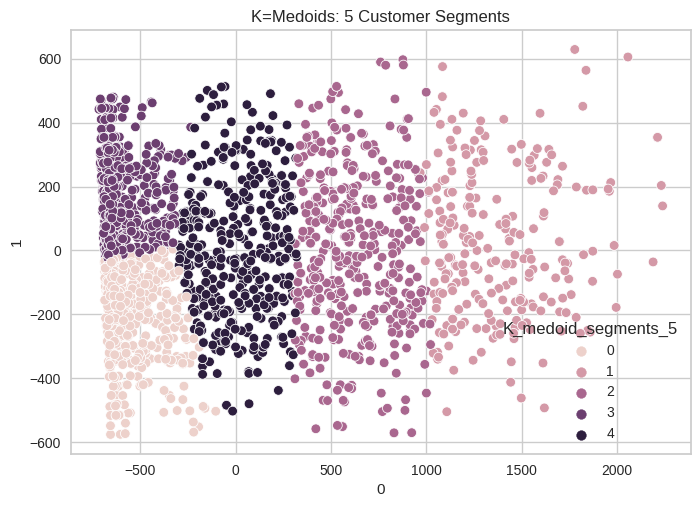

In [ ]:
PCA_PLOT(0, 1, data_pca, "K_medoid_segments_5")

### **Cluster Profiling**

In [ ]:
# Take the cluster-wise mean of all the variables. Hint: First group 'data' by cluster labels column and then find mean
cluster_profile_KMedoid_5 = data2.groupby('K_medoid_segments_5').mean(numeric_only = True)

In [ ]:
# Highlight the maximum average value among all the clusters for each of the variables
cluster_profile_KMedoid_5.style.highlight_max(color="darkgreen", axis=0)

**Let's plot the boxplot**

In [ ]:

# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']

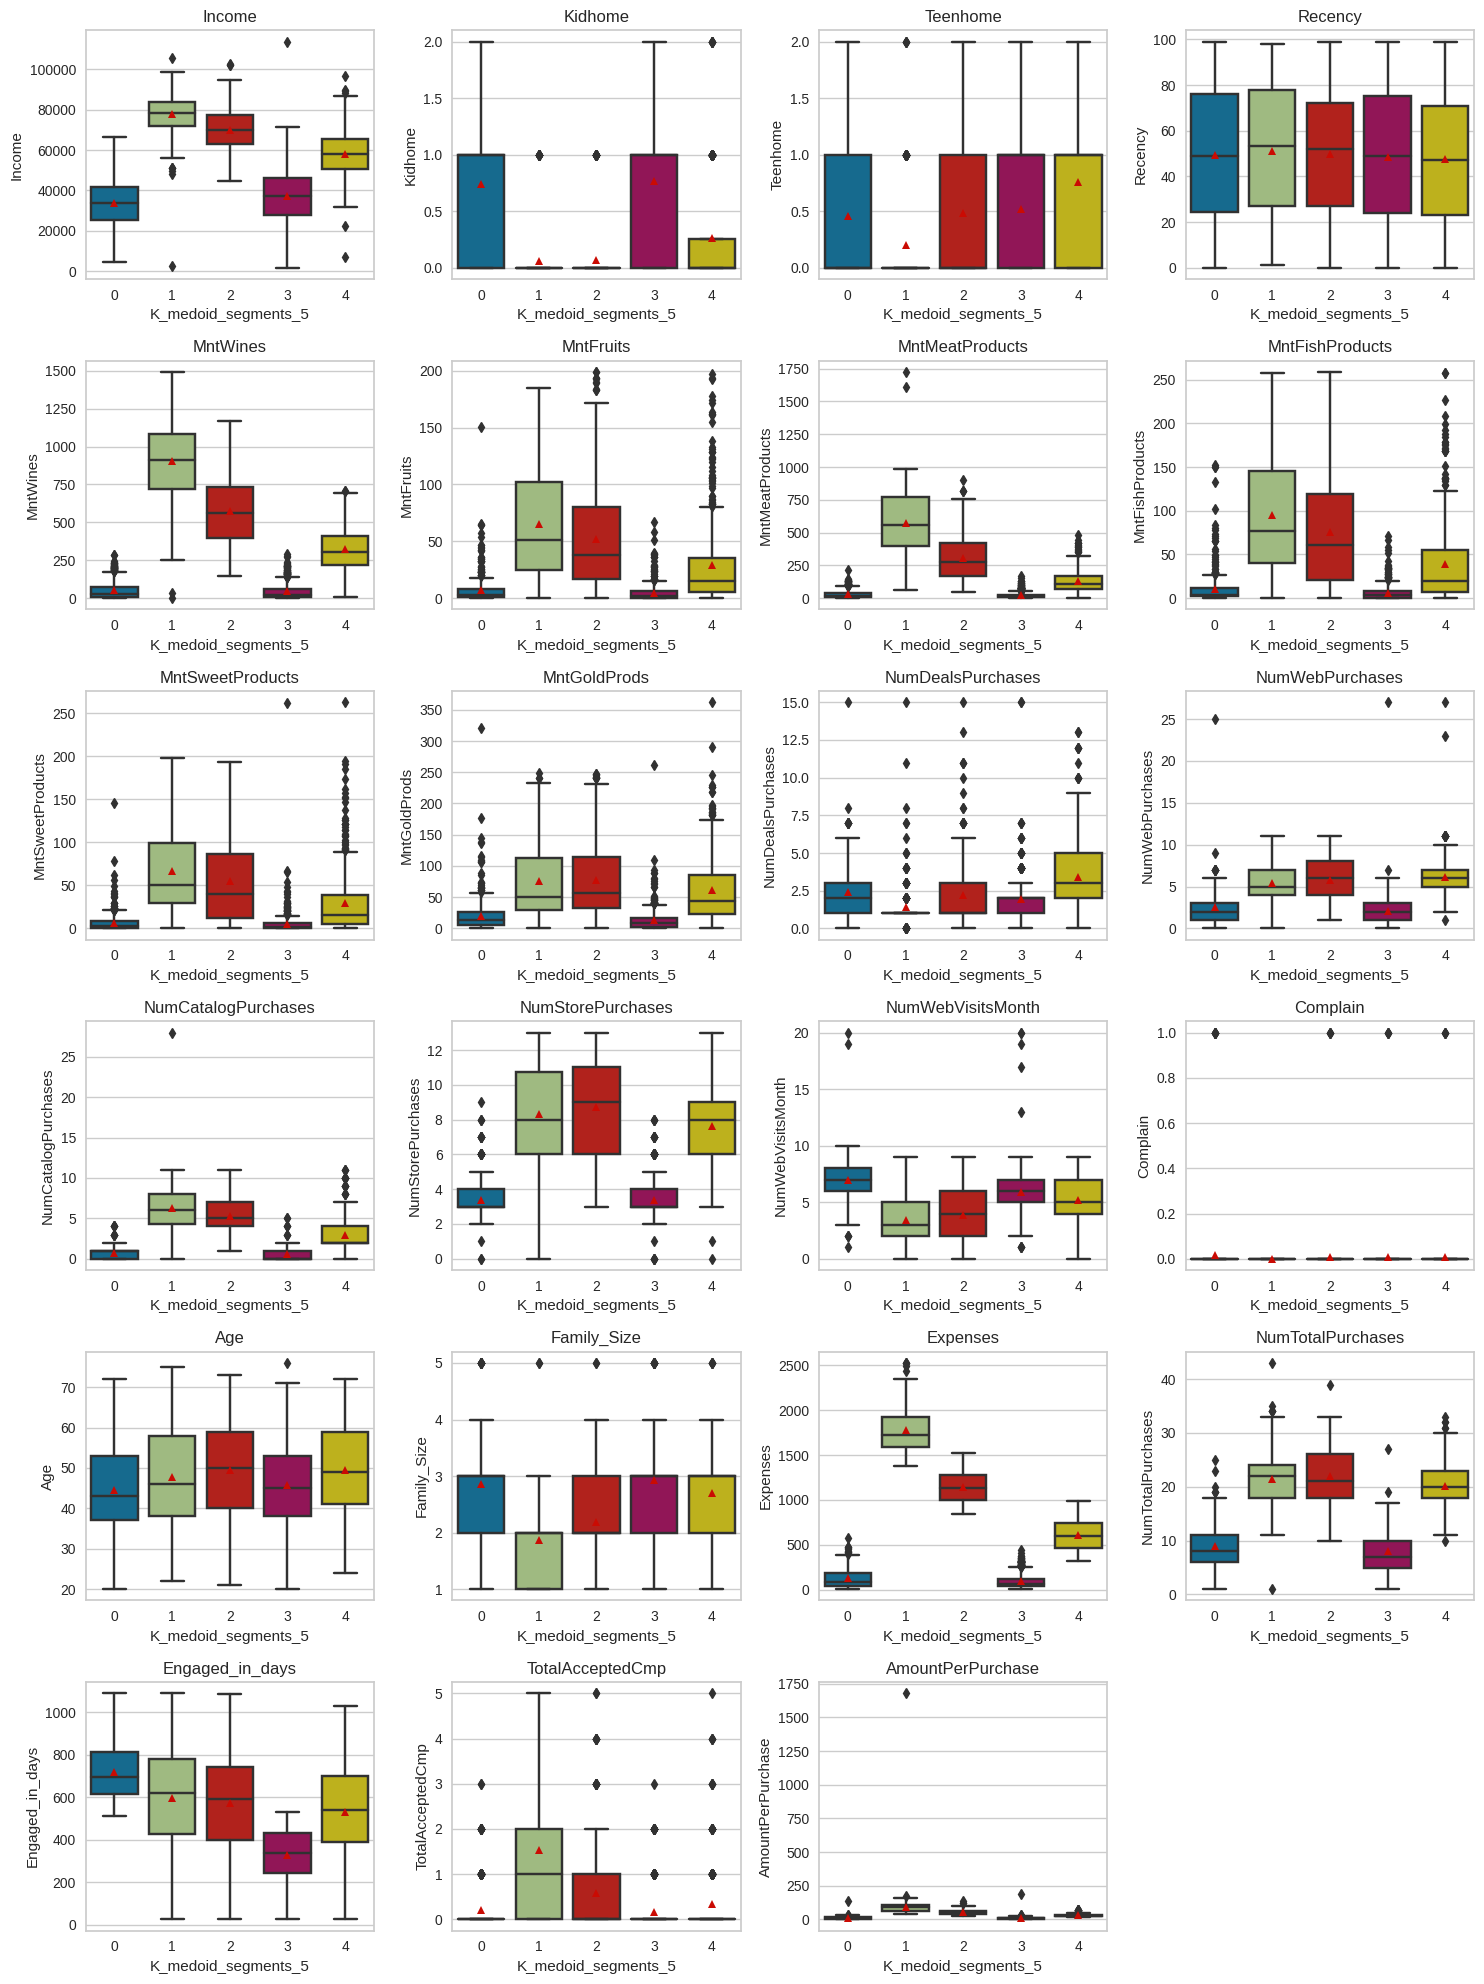

In [ ]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (15, 20))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)

    sns.boxplot(y=data2[variable], x=data2['K_medoid_segments_5'],showmeans=True)

    plt.tight_layout()

    plt.title(variable)

plt.show()

### **Characteristics of each cluster**

**Cluster 0:__________** lowest average income, ties with cluster 3 for highest number of kids, teens in the home, similar products purchased to cluster 3, except gold is slightly more, average number of deals is 2.5, low web purchases, low catalog purchases, highest average number of web visits permonth, 1 complaint, youngest average age, ties with cluster 3 for largest average family size, slightly more expenses than cluster 3, highest number of enaged days on average, low amount of accepted campaigns, low amount per purchase.

**Summary for cluster 0:_______________**

**Cluster 1:_______________**

**Summary for cluster 1:_______________** highest average income, ties with cluster 2 for kids in the home (slightly more than 0), least number of teens in the home,recent customer, highest number of wine purchases, frutis, meats, fish sweets, but ties with cluster 2 for cold purchases, fewest deals, second to most web purchases, most catalog purchases, median is most store purchases, least web visits per month, 0 complaints, most expenses, smallest family size, most number of purchases, most accepted campaigns, most amont per purchase, with outlier.


**Cluster 2:_______________**

**Summary for cluster 2:_______________**second to highest income, slightly about 0 kids with 1 outlier, more teens in home than cluster 1, fairly recent, second most wines and other goods, most in store purchases, second to most catalog purchases, about 4 web visits each month, 1 complaint, oldest median age, smaller fmaily size, second to most expenses, inerquartile range for total purchases is widest spread, second to most accepted campaigns, second o most purchase amount

**Cluster 3:_______________**

**Summary for cluster 3:_______________**average income of 40k, tied with cluster 0 for most number of kids, teens, and family size, right on par with cluster 3 with most items, methods of purchase for cluster 0 and 3 are similar, except 3 didn't purchase as many deals. Cluster 3 has higher average web visits, 1 complaint, average age may be just slightly older than average age ove cluster 0, family size is about the same for cluster 0 and cluster 3, average expenses are about the same for cluster 0 and cluster 3, engaged days is less than cluster 0, amount per purchase is about the same as 0.

**Cluster 4:_______________**

**Summary for cluster 4:_______________**income is 60k, medium amount of kids, most teens, medium amount of products, highest amount of deals, highest average web purchases, medium amount of catalog purchases, medium-high amount of store purchases, 3rd highest number of web purchases, 1 complaint, ageabout same as cluster 2, family size 3rd largest, expenses 3rd larges, lots of outliers for accepted campaigns, low amount per purchase, averg of 20 for total num purchases

In [ ]:
# Dropping labels we got from K-Medoids since we will be using PCA data for prediction
# Hint: Use axis=1 and inplace=True


data_pca.drop('K_medoid_segments_5', axis = 1, inplace = True)

data2.drop('K_medoid_segments_5', axis = 1, inplace = True)

data_model.drop('K_medoid_segments_5', axis = 1, inplace = True)

## **Hierarchical Clustering**

Let's find the Cophenetic correlation for different distances with different linkage methods.

### **What is a Cophenetic correlation?**

The cophenetic correlation coefficient is a correlation coefficient between the cophenetic distances(Dendrogramic distance) obtained from the tree, and the original distances used to construct the tree. It is a measure of how faithfully a dendrogram preserves the pairwise distances between the original unmodeled data points.

The cophenetic distance between two observations is represented in a dendrogram by the height of the link at which those two observations are first joined. That height is the distance between the two subclusters that are merged by that link.

Cophenetic correlation is the way to compare two or more dendrograms.

**Let's calculate Cophenetic correlation for each of the distance metrics with each of the linkage methods**

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average"]

high_cophenet_corr = 0                                                 # Creating a variable by assigning 0 to it
high_dm_lm = [0, 0]                                                    # Creating a list by assigning 0's to it

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_pca, metric=dm, method=lm)                    # Applying different linkages with different distance on data_pca
        c, coph_dists = cophenet(Z, pdist(data_pca))                   # Calculating cophenetic correlation
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:                                     # Checking if cophenetic correlation is higher than previous score
            high_cophenet_corr = c                                     # Appending to high_cophenet_corr list if it is higher
            high_dm_lm[0] = dm                                         # Appending its corresponding distance
            high_dm_lm[1] = lm                                         # Appending its corresponding method or linkage

Cophenetic correlation for Euclidean distance and single linkage is 0.6407488402578363.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7724388759287883.
Cophenetic correlation for Euclidean distance and average linkage is 0.8184943650703231.
Cophenetic correlation for Chebyshev distance and single linkage is 0.5731153216980509.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8129025164037713.
Cophenetic correlation for Chebyshev distance and average linkage is 0.782224852330163.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.4097416827866294.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.38483883488642745.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.4095199405527873.
Cophenetic correlation for Cityblock distance and single linkage is 0.6823091843290284.
Cophenetic correlation for Cityblock distance and complete linkage is 0.7928169645924175.
Cophenetic corr

In [ ]:
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8184943650703231, which is obtained with Euclidean distance and average linkage.


**Let's have a look at the dendrograms for different linkages with `Cityblock distance`**

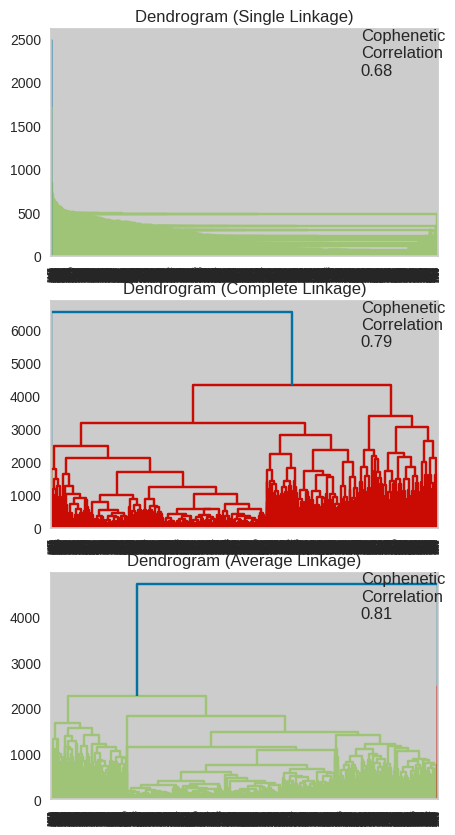

In [ ]:
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(5, 10))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Cityblock", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations and Insights:**

**Think about it:**

- Can we clearly decide the number of clusters based on where to cut the dendrogram horizontally?
- What is the next step in obtaining number of clusters based on the dendrogram?

**Let's have a look at the dendrograms for different linkages with `Chebyshev distance`**

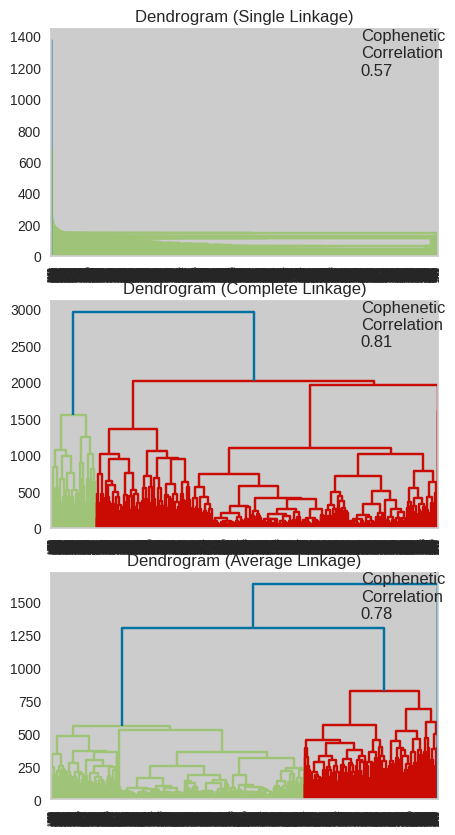

In [ ]:
# Plot the dendrogram for Chebyshev distance with linkages single, complete and average.
# Hint: Use Chebyshev distance as the metric in the linkage() function

# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(5, 10))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Chebyshev", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations and Insights:**

**Let's have a look at the dendrograms for different linkages with Mahalanobis distance**

RecursionError: ignored

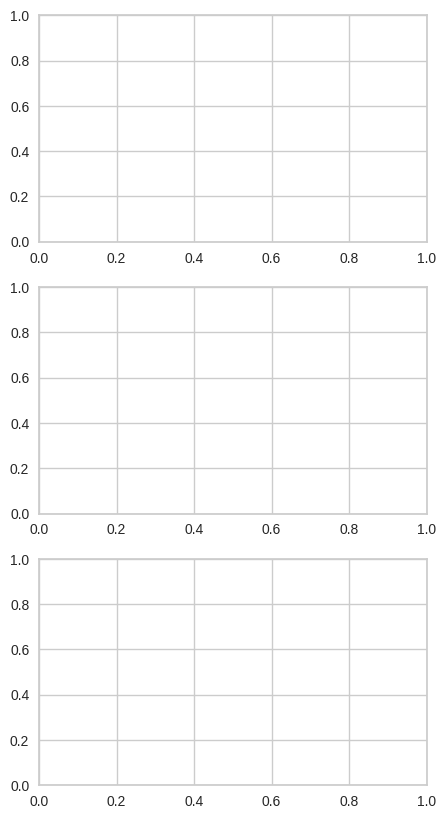

In [ ]:
# Plot the dendrogram for Mahalanobis distance with linkages single, complete and average.
# Hint: Use Mahalanobis distance as the metric in the linkage() function

# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(5, 10))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Mahalanobis", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations and Insights:**

**Let's have a look at the dendrograms for different linkages with Euclidean distance**

In [ ]:
# Plot the dendrogram for Euclidean distance with linkages single, complete, average and ward.
# Hint: Use Euclidean distance as the metric in the linkage() function

# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(5, 10))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Euclidean", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Think about it:**

- Are there any distinct clusters in any of the dendrograms?

**Observations and Insights:**

In [ ]:
# Initialize Agglomerative Clustering with affinity (distance) as Euclidean, linkage as 'Ward' with clusters=3
HCmodel = AgglomerativeClustering(n_clusters=3, affinity= 'euclidean', linkage='ward',)

# Fit on data_pca
HCmodel.fit(data_pca.values)

In [ ]:
# Silhouette Score for Hierarchical Clustering

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(data_pca.values)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

In [ ]:
# Add Agglomerative Clustering cluster labels to data_pca

# Add Agglomerative Clustering cluster labels to the whole data

# Add Agglomerative Clustering cluster labels to data_model


# Predicting on data_pca and ddding K-Medoids cluster labels to the data_pca
data_pca["HC_segments_3"] = HCmodel.labels_
# Predicting on data_pca and ddding K-Medoids cluster labels to  whole data
data2["HC_segments_3"] = HCmodel.labels_
# Predicting on data_pca and ddding K-Medoids cluster labels to data_model
data_model["HC_segments_3"] = HCmodel.labels_

In [ ]:
# Let's check the distribution
data_model["HC_segments_3"].describe()

**Let's visualize the clusters using PCA.**

In [ ]:
# Hint: Use PCA_PLOT function created above
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

In [ ]:
PCA_PLOT(0, 1, data_pca, "HC_segments_3")

### **Cluster Profiling**

In [ ]:
# Take the cluster-wise mean of all the variables. Hint: First group 'data' by cluster labels column and then find mean
cluster_profile_HCmodel_3 = data2.groupby('HC_segments_3').mean(numeric_only = True)

In [ ]:
# Highlight the maximum average value among all the clusters for each of the variables
cluster_profile_HCmodel_3.style.highlight_max(color="darkgreen", axis=0)

**Let's plot the boxplot**

In [ ]:
# Create boxplot for each of the variables
# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']

In [ ]:
all_col = col_for_box

plt.figure(figsize = (15, 20))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)

    sns.boxplot(y=data2[variable], x=data2['HC_segments_3'],showmeans=True)

    plt.tight_layout()

    plt.title(variable)

plt.show()

### **Characteristics of each cluster**

**Cluster 0:__________** medium income, low kids, high teens, medium products, high deals, high web purchases, medium cataalog purchases, high store purchases, medium web visits, 1 complaint, high age, medium family size, medium expenses, total purchases ties with cluster 2, medium accepted campaign, medium amount per purchase,

**Summary for cluster 0:_______________**

**Cluster 1:_______________**

**Summary for cluster 1:_______________**


**Cluster 2:_______________**

**Summary for cluster 2:_______________**

**Observations and Insights:**

In [ ]:
# Dropping labels we got from Agglomerative Clustering since we will be using PCA data for prediction
# Hint: Use axis=1 and inplace=True
data_pca.drop('HC_segments_3', axis = 1, inplace = True)

data2.drop('HC_segments_3', axis = 1, inplace = True)

data_model.drop('HC_segments_3', axis = 1, inplace = True)

## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming data_pca is your DataFrame containing numeric data
# Extract relevant columns as the feature matrix
X = data_pca.values

# Initializing lists
eps_values = [1, 50]
min_sample_values = [1, 50]

# Creating a dictionary for each of the values in eps_values with min_sample_values
res = {eps: {} for eps in eps_values}

# Loop through eps values
for eps in eps_values:
    # Loop through min_sample values
    for min_samples in min_sample_values:
        try:
            # Create DBSCAN instance
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)

            # Fit the model
            labels = dbscan.fit_predict(X)

            # Check if there is more than one cluster
            if len(set(labels)) > 1:
                # Calculate silhouette score
                silhouette_avg = silhouette_score(X, labels)

                # Store the result in the dictionary
                res[eps][min_samples] = silhouette_avg
            else:
                print(f"No meaningful clustering for eps={eps}, min_samples={min_samples}")
        except Exception as e:
            print(f"Error for eps={eps}, min_samples={min_samples}: {e}")

# Print the silhouette scores
for eps, min_samples_dict in res.items():
    for min_samples, silhouette_score_value in min_samples_dict.items():
        print(f"eps={eps}, min_samples={min_samples}: Silhouette Score = {silhouette_score_value}")



In [ ]:
# Initializing lists
eps_value = [2,3]                       # Taking random eps value
min_sample_values = [6,20]              # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}

In [ ]:
# Finding the silhouette_score for each of the combinations
high_silhouette_avg = 1                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps=i, min_samples=j).fit(data_pca.values)               # Applying DBSCAN to each of the combination in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(data_pca, labels)           # Finding silhouette score
        print(
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                          # Printing the silhouette score for each of the combinations
        )
        if high_silhouette_avg < silhouette_avg:                     # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j
            high_silhouette_avg = silhouette_avg
            high_i_j = [i, j]
            #high_i_j[0] = i
            #high_i_j[1] = j

In [ ]:
# Printing the highest silhouette score
print("Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(high_silhouette_avg, high_i_j[0], high_i_j[1]))

**Now, let's apply DBSCAN using the hyperparameter values we have received above.**

In [ ]:
# Apply DBSCAN using the above hyperparameter values
dbs = DBSCAN(eps = 3, min_samples = 20)

In [ ]:
# fit_predict on data_pca and add DBSCAN cluster labels to data_pca
data_pca["db_segments"] = kmeans.labels_
# fit_predict on data_pca and add DBSCAN cluster labels to the whole data
data2["db_segments"] = kmeans.labels_
# fit_predict on data_pca and add DBSCAN cluster labels to data_model
data_model["db_segments"] = kmeans.labels_

In [ ]:
# Let's check the distribution
data_model["db_segments"].describe()

**Let's visualize the clusters using PCA.**

In [ ]:
# Hint: Use PCA_PLOT function created above
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

In [ ]:
PCA_PLOT(0, 1, data_pca, "db_segments")

**Observations and Insights:**

**Think about it:**

- Changing the eps and min sample values will result in different DBSCAN results? Can we try more value for eps and min_sample?

**Note:** You can experiment with different eps and min_sample values to see if DBSCAN produces good distribution and cluster profiles.

In [ ]:
# Dropping labels we got from DBSCAN since we will be using PCA data for prediction
# Hint: Use axis=1 and inplace=True

data_pca.drop('db_segments', axis = 1, inplace = True)

data2.drop('db_segments', axis = 1, inplace = True)

data_model.drop('db_segments', axis = 1, inplace = True)

## **Gaussian Mixture Model**

**Let's find the silhouette score for K=5 in Gaussian Mixture**

In [ ]:
gmm = GaussianMixture(n_components=5, random_state=1).fit(data_pca) # Initialize Gaussian Mixture Model with number of clusters as 5 and random_state=1

preds = gmm.predict(data_pca)            # Fit and predict Gaussian Mixture Model using data_pca

score = silhouette_score(data_pca,preds)           # Calculate the silhouette score

print(score)                   # Print the score



**Observations and Insights:**

In [ ]:
# Predicting on data_pca and add Gaussian Mixture Model cluster labels to data_pca
data_pca["gmm_segments_5"] = kmeans.labels_
# Predicting on data_pca and add Gaussian Mixture Model cluster labels to the whole data
data2["gmm_segments_5"] = kmeans.labels_
# Predicting on data_pca and add Gaussian Mixture Model cluster labels to data_model
data_model["gmm_segments_5"] = kmeans.labels_

In [ ]:
# Let's check the distribution
data_model["gmm_segments_5"].describe()

**Let's visualize the clusters using PCA.**

In [ ]:
# Hint: Use PCA_PLOT function created above
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

In [ ]:
PCA_PLOT(0, 1, data_pca,"gmm_segments_5")

### **Cluster Profiling**

In [ ]:
# Take the cluster-wise mean of all the variables. Hint: First group 'data' by cluster labels column and then find mean
cluster_profile_gmm_5 = data2.groupby('gmm_segments_5').mean(numeric_only = True)

In [ ]:
# Highlight the maximum average value among all the clusters for each of the variables
cluster_profile_gmm_5.style.highlight_max(color="darkgreen", axis=0)

**Let's plot the boxplot**

In [ ]:
# Create boxplot for each of the variables

# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']

In [ ]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (15, 20))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)

    sns.boxplot(y=data2[variable], x=data2['gmm_segments_5'],showmeans=True)

    plt.tight_layout()

    plt.title(variable)

plt.show()

### **Characteristics of each cluster**

**Cluster 0:__________**

**Summary for cluster 0:_______________**

**Cluster 1:_______________**

**Summary for cluster 1:_______________**


**Cluster 2:_______________**

**Summary for cluster 2:_______________**

**Cluster 3:_______________**

**Summary for cluster 3:_______________**

**Cluster 4:_______________**

**Summary for cluster 4:_______________**

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?